# LAB Manual UCS615: IMAGE PROCESSING
## Complete Implementation of All Experiments

This notebook contains implementations of all image processing experiments from the lab manual.

In [103]:
# Import all required libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from scipy import ndimage
from scipy.ndimage import convolve, median_filter, gaussian_filter
from skimage import exposure, filters, feature
from skimage.metrics import peak_signal_noise_ratio as psnr
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Create a sample grayscale image for demonstrations
def create_sample_image(size=(256, 256)):
    """Create a sample grayscale image"""
    img = np.zeros(size, dtype=np.uint8)
    # Add some geometric shapes
    cv2.rectangle(img, (50, 50), (150, 150), 200, -1)
    cv2.circle(img, (180, 180), 40, 150, -1)
    cv2.rectangle(img, (100, 180), (140, 220), 100, -1)
    return img

# Create a sample color image
def create_sample_color_image(size=(256, 256)):
    """Create a sample RGB image"""
    img = np.zeros((*size, 3), dtype=np.uint8)
    cv2.rectangle(img, (50, 50), (150, 150), (255, 0, 0), -1)  # Blue
    cv2.circle(img, (180, 180), 40, (0, 255, 0), -1)  # Green
    cv2.rectangle(img, (100, 180), (140, 220), (0, 0, 255), -1)  # Red
    return img

print("Libraries imported successfully!")
print("OpenCV version:", cv2.__version__)
print("NumPy version:", np.__version__)

Libraries imported successfully!
OpenCV version: 4.11.0
NumPy version: 2.2.5


---
## Experiment 1: Grayscale to Binary Conversion
Convert grayscale image to binary image using:
- Case 1: Mean intensity as threshold
- Case 2: User-defined threshold

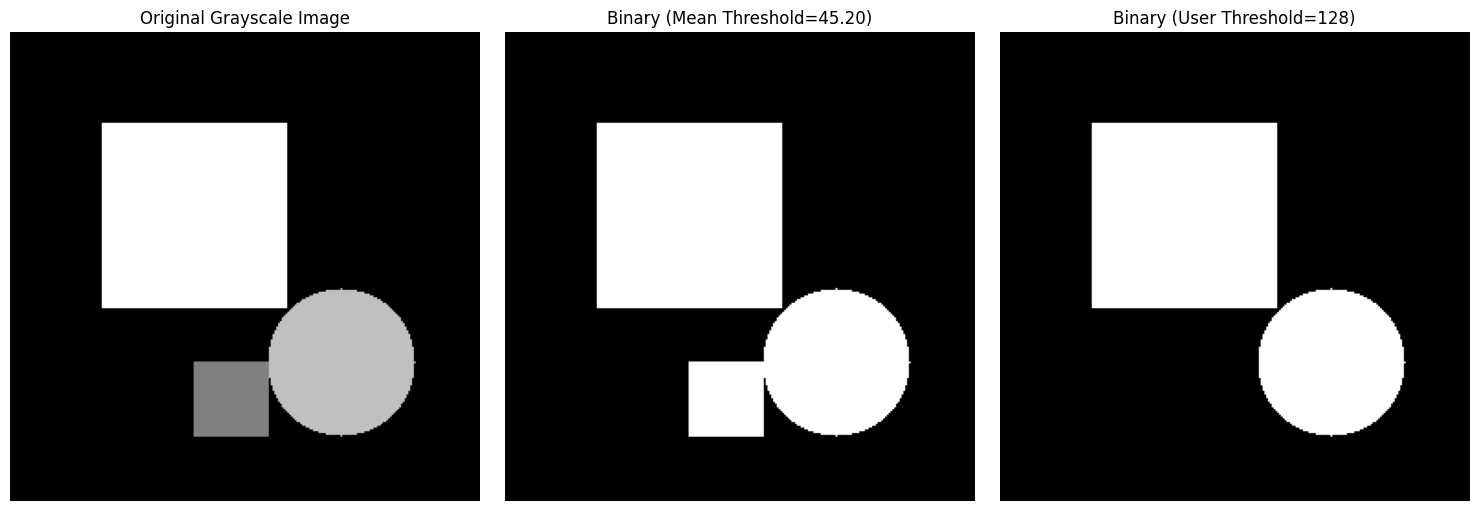

Mean threshold value: 45.20
User threshold value: 128


In [104]:
def grayscale_to_binary_mean(img):
    """Convert grayscale to binary using mean intensity as threshold"""
    threshold = np.mean(img)
    binary = (img >= threshold).astype(np.uint8) * 255
    return binary, threshold

def grayscale_to_binary_user(img, threshold):
    """Convert grayscale to binary using user-defined threshold"""
    binary = (img >= threshold).astype(np.uint8) * 255
    return binary

# Test the functions
gray_img = create_sample_image()

# Case 1: Mean threshold
binary_mean, mean_threshold = grayscale_to_binary_mean(gray_img)

# Case 2: User threshold
user_threshold = 128
binary_user = grayscale_to_binary_user(gray_img, user_threshold)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(gray_img, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')

axes[1].imshow(binary_mean, cmap='gray')
axes[1].set_title(f'Binary (Mean Threshold={mean_threshold:.2f})')
axes[1].axis('off')

axes[2].imshow(binary_user, cmap='gray')
axes[2].set_title(f'Binary (User Threshold={user_threshold})')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print(f"Mean threshold value: {mean_threshold:.2f}")
print(f"User threshold value: {user_threshold}")

---
## Experiment 2: RGB to Grayscale Conversion
- Case 1: Simple mean average of three planes
- Case 2: Weighted average (user-defined weights)

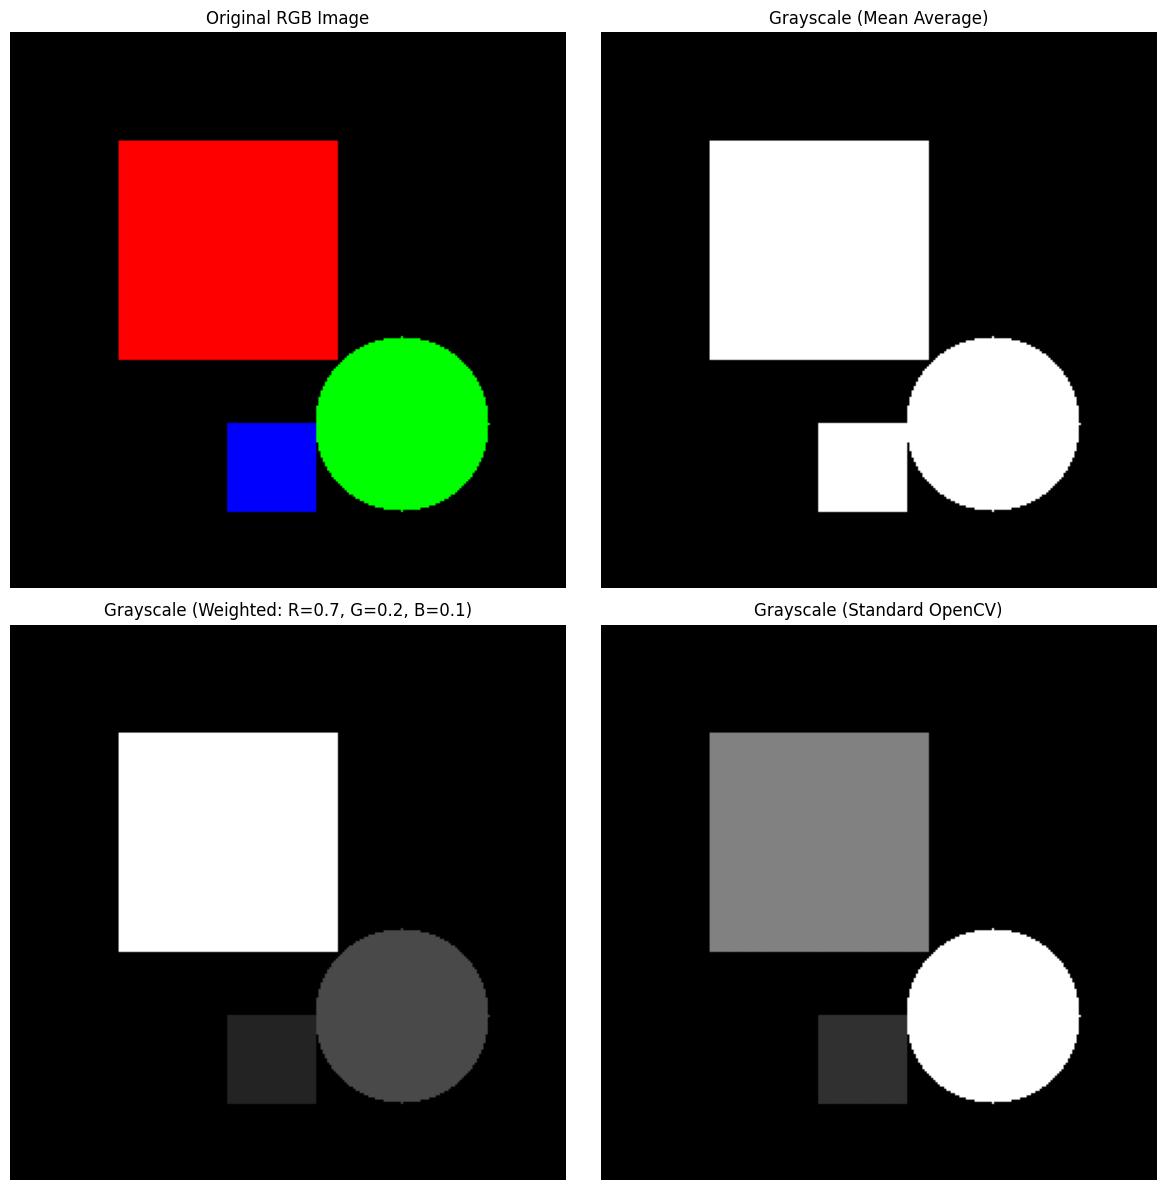

In [105]:
def rgb_to_gray_mean(img):
    """Convert RGB to grayscale using mean average"""
    gray = np.mean(img, axis=2).astype(np.uint8)
    return gray

def rgb_to_gray_weighted(img, weights):
    """Convert RGB to grayscale using weighted average
    weights: tuple (r_weight, g_weight, b_weight)
    Example: (0.7, 0.2, 0.1)
    """
    r_w, g_w, b_w = weights
    # Validate weights sum to 1
    assert abs(sum(weights) - 1.0) < 1e-6, "Weights must sum to 1"
    
    gray = (img[:, :, 0] * r_w + img[:, :, 1] * g_w + img[:, :, 2] * b_w).astype(np.uint8)
    return gray

# Test the functions
color_img = create_sample_color_image()

# Case 1: Mean average
gray_mean = rgb_to_gray_mean(color_img)

# Case 2: Weighted average
weights = (0.7, 0.2, 0.1)  # R, G, B weights
gray_weighted = rgb_to_gray_weighted(color_img, weights)

# Standard conversion for comparison
gray_standard = cv2.cvtColor(color_img, cv2.COLOR_RGB2GRAY)

# Display results
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes[0, 0].imshow(color_img)
axes[0, 0].set_title('Original RGB Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(gray_mean, cmap='gray')
axes[0, 1].set_title('Grayscale (Mean Average)')
axes[0, 1].axis('off')

axes[1, 0].imshow(gray_weighted, cmap='gray')
axes[1, 0].set_title(f'Grayscale (Weighted: R={weights[0]}, G={weights[1]}, B={weights[2]})')
axes[1, 0].axis('off')

axes[1, 1].imshow(gray_standard, cmap='gray')
axes[1, 1].set_title('Grayscale (Standard OpenCV)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

---
## Experiment 3: Draw Border/Padding Around Image
Add border to both binary and grayscale images

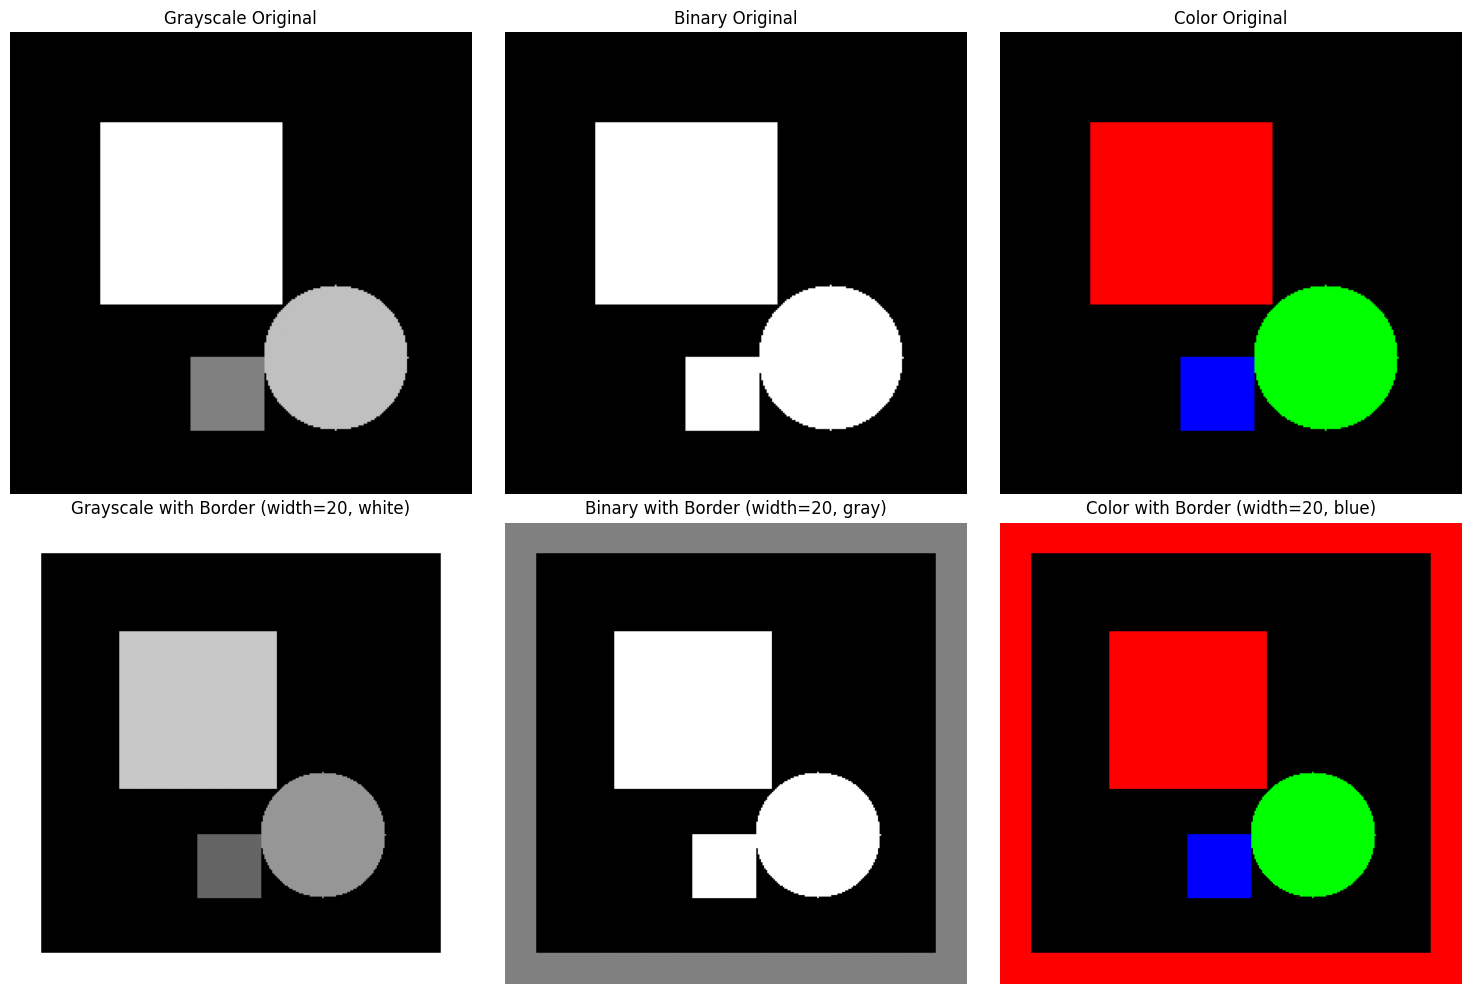

Original image shape: (256, 256)
Bordered image shape: (296, 296)


In [106]:
def add_border(img, width, color):
    """Add border to image
    width: border width in pixels
    color: border color (0-255 for grayscale, tuple for RGB)
    """
    if len(img.shape) == 2:  # Grayscale
        bordered = cv2.copyMakeBorder(img, width, width, width, width, 
                                     cv2.BORDER_CONSTANT, value=color)
    else:  # Color
        bordered = cv2.copyMakeBorder(img, width, width, width, width, 
                                     cv2.BORDER_CONSTANT, value=color)
    return bordered

# Test with grayscale
gray_img = create_sample_image()
gray_bordered = add_border(gray_img, width=20, color=255)

# Test with binary
binary_img, _ = grayscale_to_binary_mean(gray_img)
binary_bordered = add_border(binary_img, width=20, color=128)

# Test with color
color_img = create_sample_color_image()
color_bordered = add_border(color_img, width=20, color=(255, 0, 0))  # Blue border

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(gray_img, cmap='gray')
axes[0, 0].set_title('Grayscale Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(binary_img, cmap='gray')
axes[0, 1].set_title('Binary Original')
axes[0, 1].axis('off')

axes[0, 2].imshow(color_img)
axes[0, 2].set_title('Color Original')
axes[0, 2].axis('off')

axes[1, 0].imshow(gray_bordered, cmap='gray')
axes[1, 0].set_title('Grayscale with Border (width=20, white)')
axes[1, 0].axis('off')

axes[1, 1].imshow(binary_bordered, cmap='gray')
axes[1, 1].set_title('Binary with Border (width=20, gray)')
axes[1, 1].axis('off')

axes[1, 2].imshow(color_bordered)
axes[1, 2].set_title('Color with Border (width=20, blue)')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print(f"Original image shape: {gray_img.shape}")
print(f"Bordered image shape: {gray_bordered.shape}")

---
## Experiment 4: Image Complement
Compute complement for both binary and grayscale images

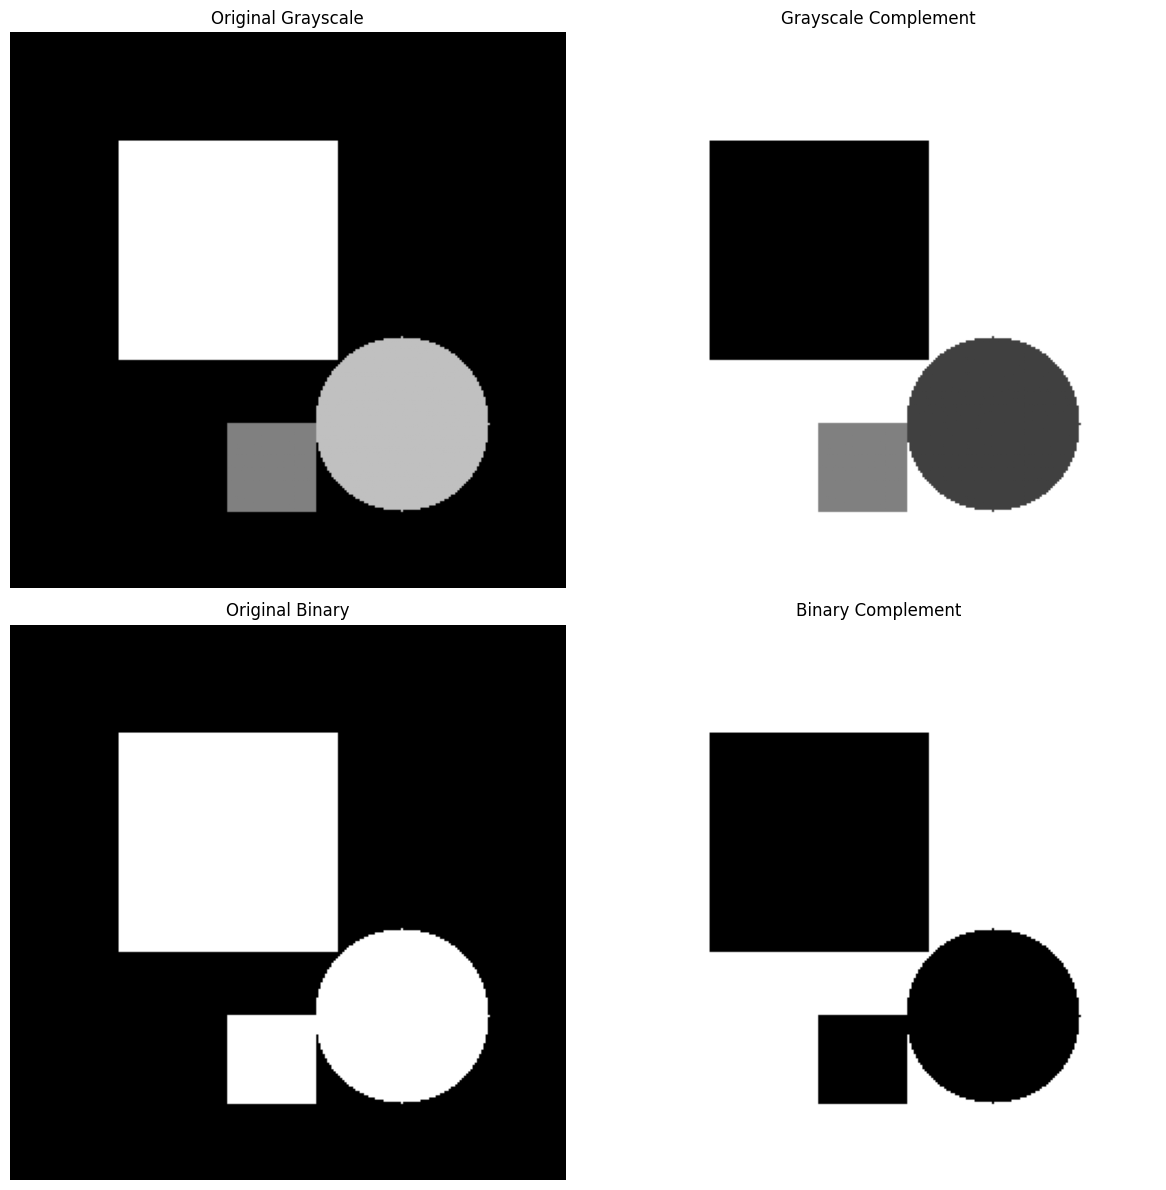

In [107]:
def image_complement(img):
    """Compute image complement (negative)"""
    return 255 - img

# Test with grayscale and binary
gray_img = create_sample_image()
gray_complement = image_complement(gray_img)

binary_img, _ = grayscale_to_binary_mean(gray_img)
binary_complement = image_complement(binary_img)

# Display results
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0, 0].imshow(gray_img, cmap='gray')
axes[0, 0].set_title('Original Grayscale')
axes[0, 0].axis('off')

axes[0, 1].imshow(gray_complement, cmap='gray')
axes[0, 1].set_title('Grayscale Complement')
axes[0, 1].axis('off')

axes[1, 0].imshow(binary_img, cmap='gray')
axes[1, 0].set_title('Original Binary')
axes[1, 0].axis('off')

axes[1, 1].imshow(binary_complement, cmap='gray')
axes[1, 1].set_title('Binary Complement')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

---
## Experiment 5: Log Transform Enhancement
Enhance image using log transformation (c=1)

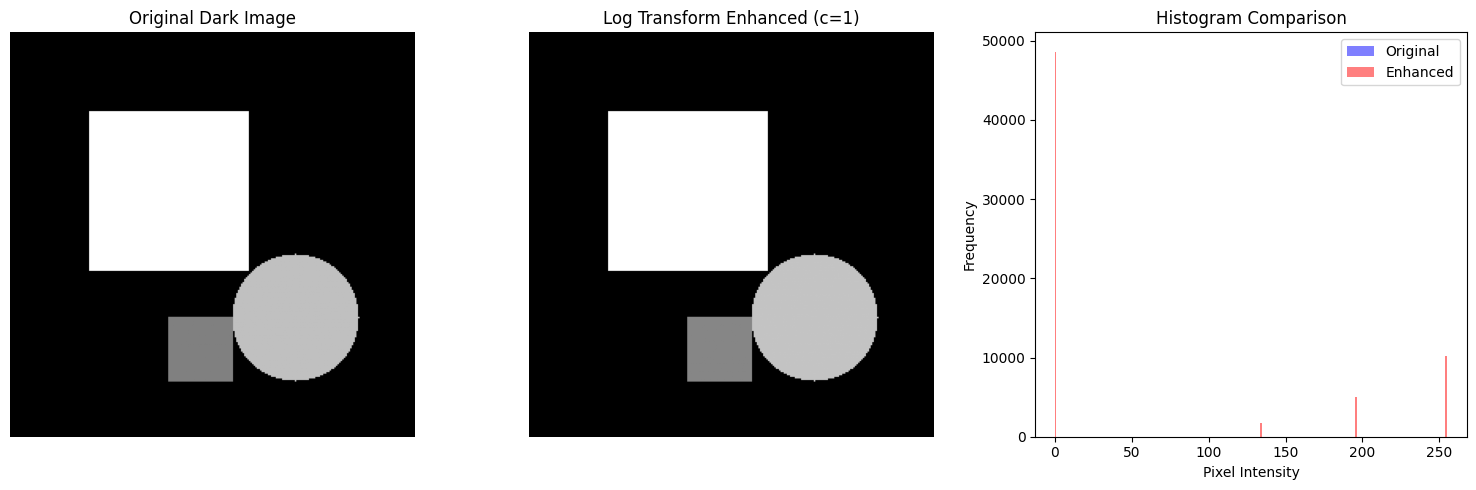

Original - Min: 0, Max: 60, Mean: 13.56
Enhanced - Min: 0, Max: 255, Mean: 58.15


In [108]:
def log_transform(img, c=1):
    """Apply log transformation: s = c * log(1 + r)"""
    # Normalize to [0, 1]
    img_normalized = img.astype(np.float32) / 255.0
    # Apply log transform
    log_transformed = c * np.log1p(img_normalized)
    # Normalize back to [0, 255]
    log_transformed = (log_transformed / log_transformed.max() * 255).astype(np.uint8)
    return log_transformed

# Create a dark image to demonstrate log transform
dark_img = create_sample_image()
dark_img = (dark_img * 0.3).astype(np.uint8)  # Make it darker

log_enhanced = log_transform(dark_img, c=1)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(dark_img, cmap='gray')
axes[0].set_title('Original Dark Image')
axes[0].axis('off')

axes[1].imshow(log_enhanced, cmap='gray')
axes[1].set_title('Log Transform Enhanced (c=1)')
axes[1].axis('off')

# Plot histograms
axes[2].hist(dark_img.ravel(), bins=256, alpha=0.5, label='Original', color='blue')
axes[2].hist(log_enhanced.ravel(), bins=256, alpha=0.5, label='Enhanced', color='red')
axes[2].set_title('Histogram Comparison')
axes[2].set_xlabel('Pixel Intensity')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.tight_layout()
plt.show()

print(f"Original - Min: {dark_img.min()}, Max: {dark_img.max()}, Mean: {dark_img.mean():.2f}")
print(f"Enhanced - Min: {log_enhanced.min()}, Max: {log_enhanced.max()}, Mean: {log_enhanced.mean():.2f}")

---
## Experiment 6: Power Law/Gamma Transform
Enhance image using gamma transformation

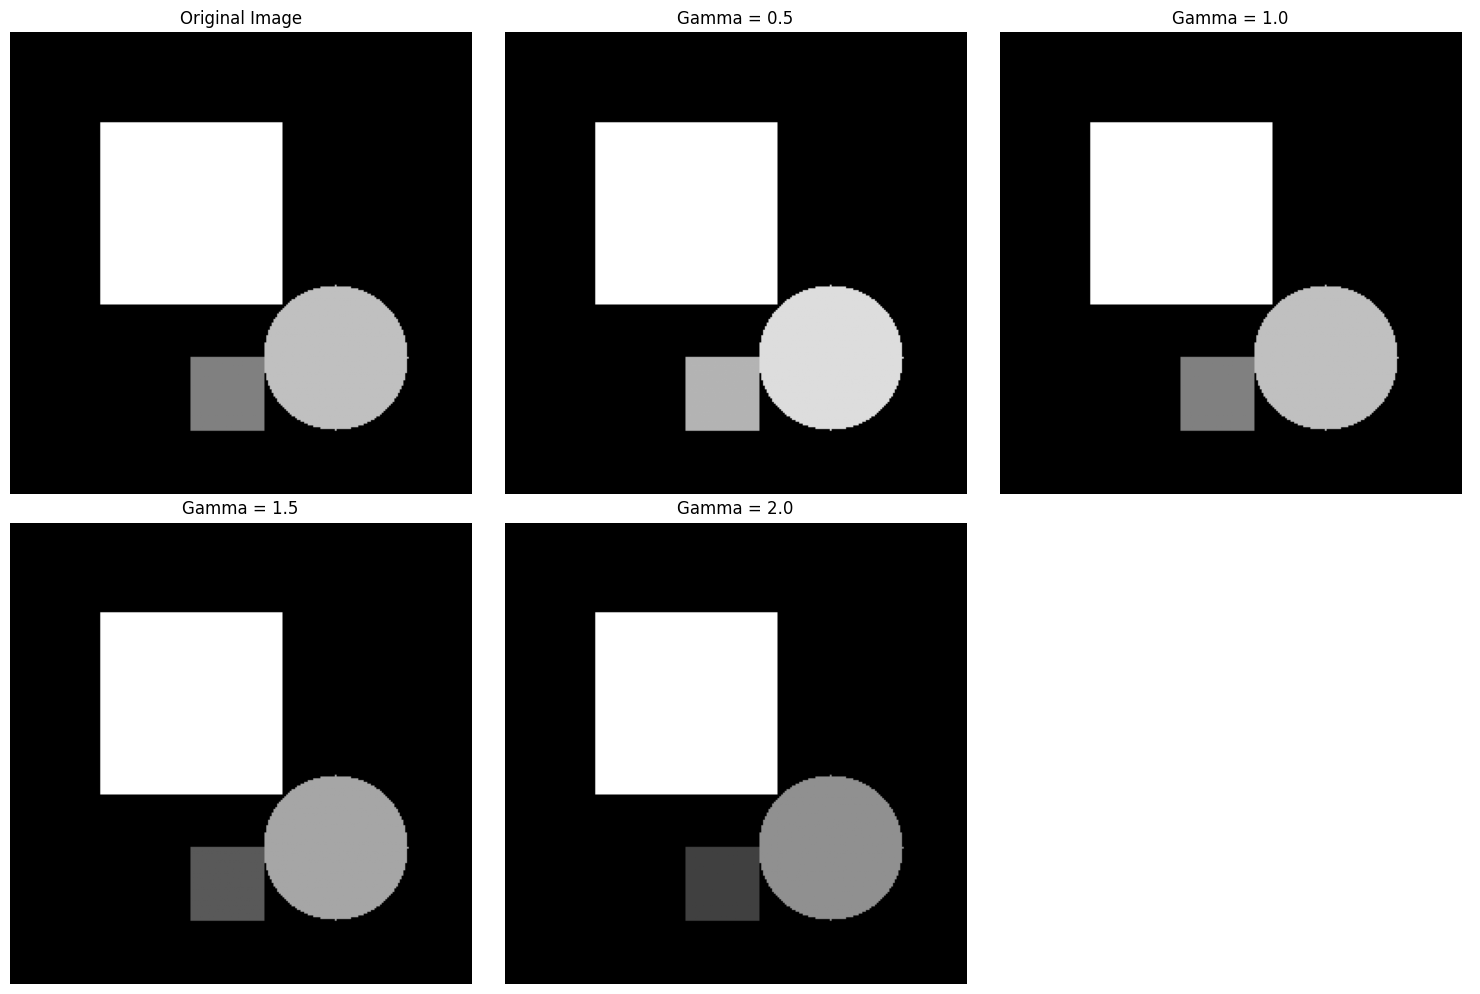

Gamma < 1: Brightens the image (expands dark regions)
Gamma = 1: No change
Gamma > 1: Darkens the image (compresses dark regions)


In [109]:
def gamma_transform(img, c=1, gamma=1.0):
    """Apply gamma transformation: s = c * r^gamma"""
    # Normalize to [0, 1]
    img_normalized = img.astype(np.float32) / 255.0
    # Apply gamma transform
    gamma_transformed = c * np.power(img_normalized, gamma)
    # Clip and convert back to [0, 255]
    gamma_transformed = np.clip(gamma_transformed * 255, 0, 255).astype(np.uint8)
    return gamma_transformed

# Test with different gamma values
img = create_sample_image()

gamma_values = [0.5, 1.0, 1.5, 2.0]
results = [gamma_transform(img, c=1, gamma=g) for g in gamma_values]

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

for idx, (gamma, result) in enumerate(zip(gamma_values, results)):
    row = (idx + 1) // 3
    col = (idx + 1) % 3
    axes[row, col].imshow(result, cmap='gray')
    axes[row, col].set_title(f'Gamma = {gamma}')
    axes[row, col].axis('off')

# Hide last subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("Gamma < 1: Brightens the image (expands dark regions)")
print("Gamma = 1: No change")
print("Gamma > 1: Darkens the image (compresses dark regions)")

---
## Experiment 7: Intensity Level Slicing (Contrast Stretching)
Stretch intensity values from input range to output range

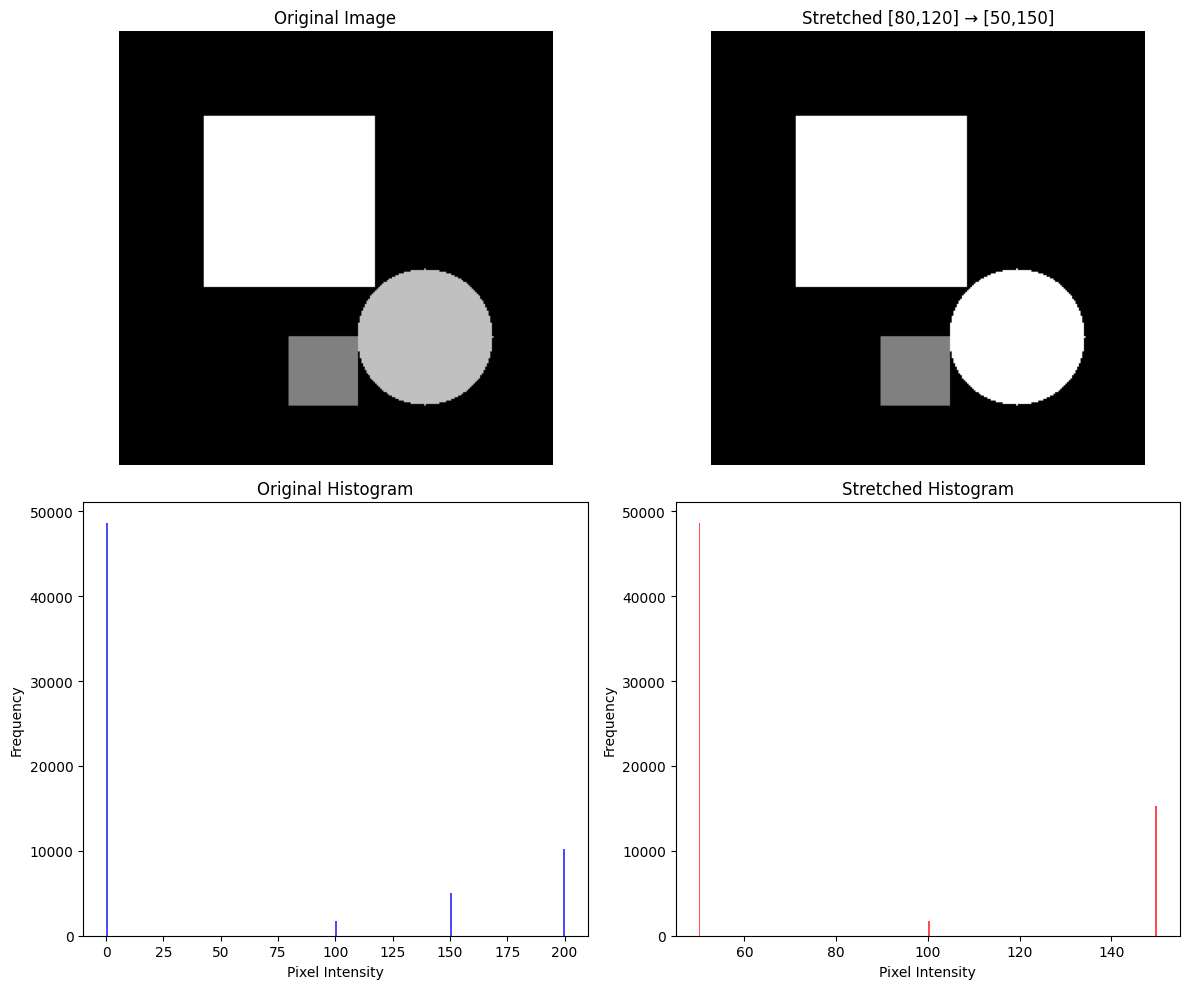

Original - Min: 0, Max: 200
Stretched - Min: 50, Max: 150


In [110]:
def contrast_stretching(img, in_min, in_max, out_min, out_max):
    """Stretch intensity values from [in_min, in_max] to [out_min, out_max]"""
    # Clip input to specified range
    img_clipped = np.clip(img, in_min, in_max)
    # Stretch to output range
    stretched = ((img_clipped - in_min) / (in_max - in_min) * (out_max - out_min) + out_min)
    return stretched.astype(np.uint8)

# Test the function
img = create_sample_image()

# Example: stretch [80, 120] to [50, 150]
stretched = contrast_stretching(img, in_min=80, in_max=120, out_min=50, out_max=150)

# Full contrast stretch
full_stretched = contrast_stretching(img, img.min(), img.max(), 0, 255)

# Display results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(stretched, cmap='gray')
axes[0, 1].set_title('Stretched [80,120] → [50,150]')
axes[0, 1].axis('off')

axes[1, 0].hist(img.ravel(), bins=256, alpha=0.7, color='blue')
axes[1, 0].set_title('Original Histogram')
axes[1, 0].set_xlabel('Pixel Intensity')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(stretched.ravel(), bins=256, alpha=0.7, color='red')
axes[1, 1].set_title('Stretched Histogram')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Original - Min: {img.min()}, Max: {img.max()}")
print(f"Stretched - Min: {stretched.min()}, Max: {stretched.max()}")

---
## Experiment 8: Histogram Equalization
Enhance image using histogram equalization

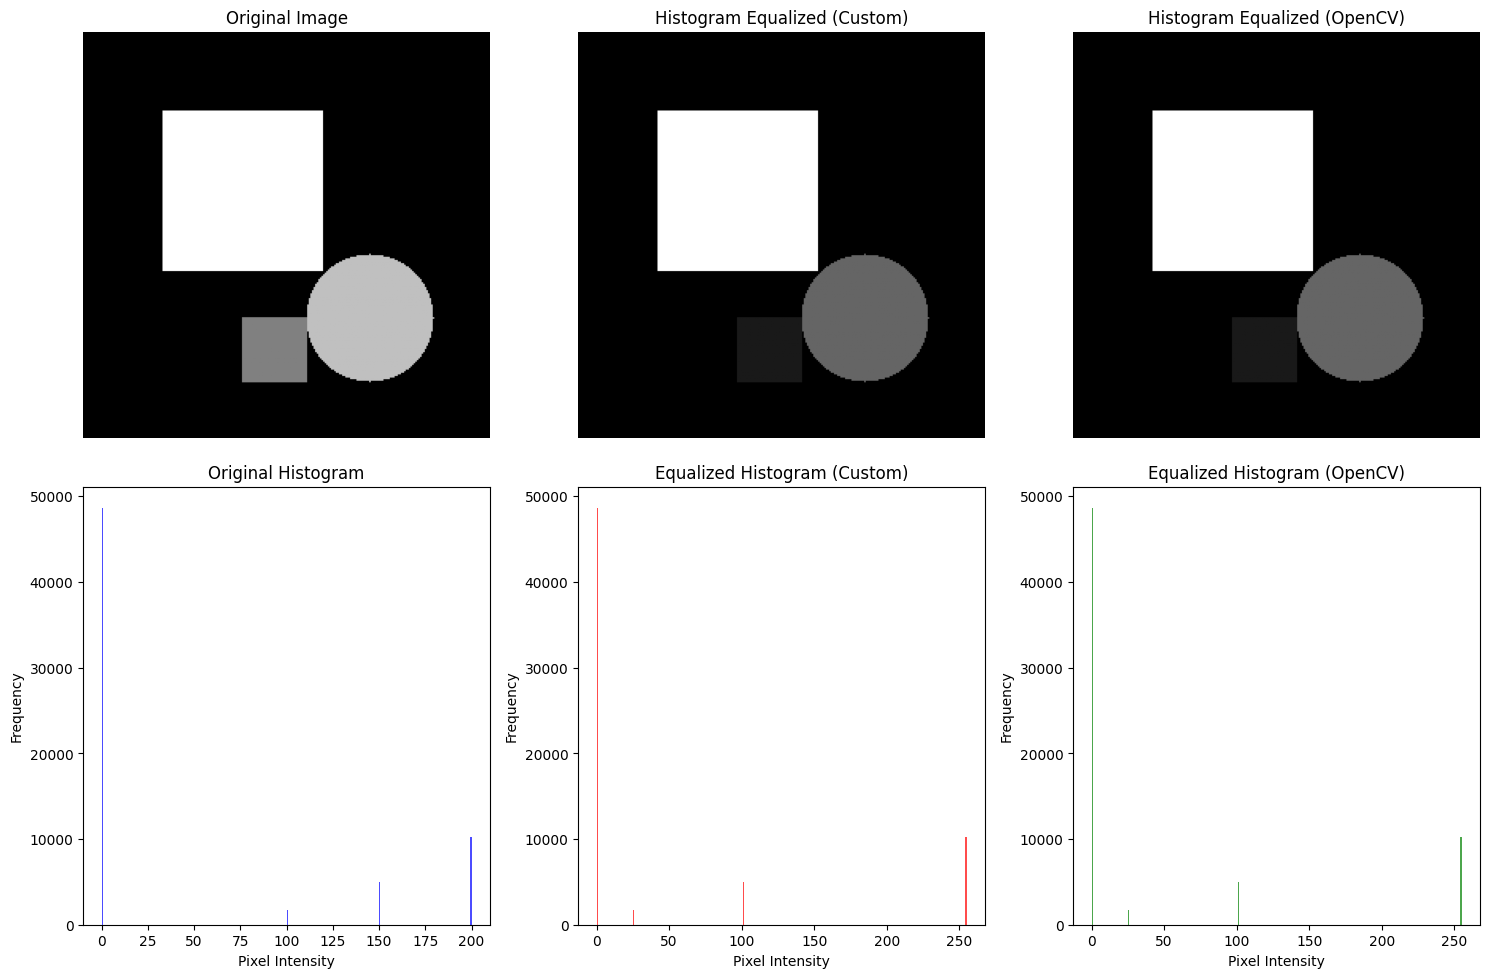

In [111]:
def histogram_equalization(img):
    """Apply histogram equalization"""
    # Calculate histogram
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    # Calculate CDF
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    # Mask all zeros
    cdf_m = np.ma.masked_equal(cdf, 0)
    # Normalize CDF
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    # Apply transformation
    equalized = cdf[img]
    return equalized

# Test the function
img = create_sample_image()
equalized = histogram_equalization(img)

# Also using OpenCV for comparison
equalized_cv = cv2.equalizeHist(img)

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(equalized, cmap='gray')
axes[0, 1].set_title('Histogram Equalized (Custom)')
axes[0, 1].axis('off')

axes[0, 2].imshow(equalized_cv, cmap='gray')
axes[0, 2].set_title('Histogram Equalized (OpenCV)')
axes[0, 2].axis('off')

axes[1, 0].hist(img.ravel(), bins=256, color='blue', alpha=0.7)
axes[1, 0].set_title('Original Histogram')
axes[1, 0].set_xlabel('Pixel Intensity')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(equalized.ravel(), bins=256, color='red', alpha=0.7)
axes[1, 1].set_title('Equalized Histogram (Custom)')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

axes[1, 2].hist(equalized_cv.ravel(), bins=256, color='green', alpha=0.7)
axes[1, 2].set_title('Equalized Histogram (OpenCV)')
axes[1, 2].set_xlabel('Pixel Intensity')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

---
## Experiment 9: Histogram Matching
Match histogram of input image to reference image

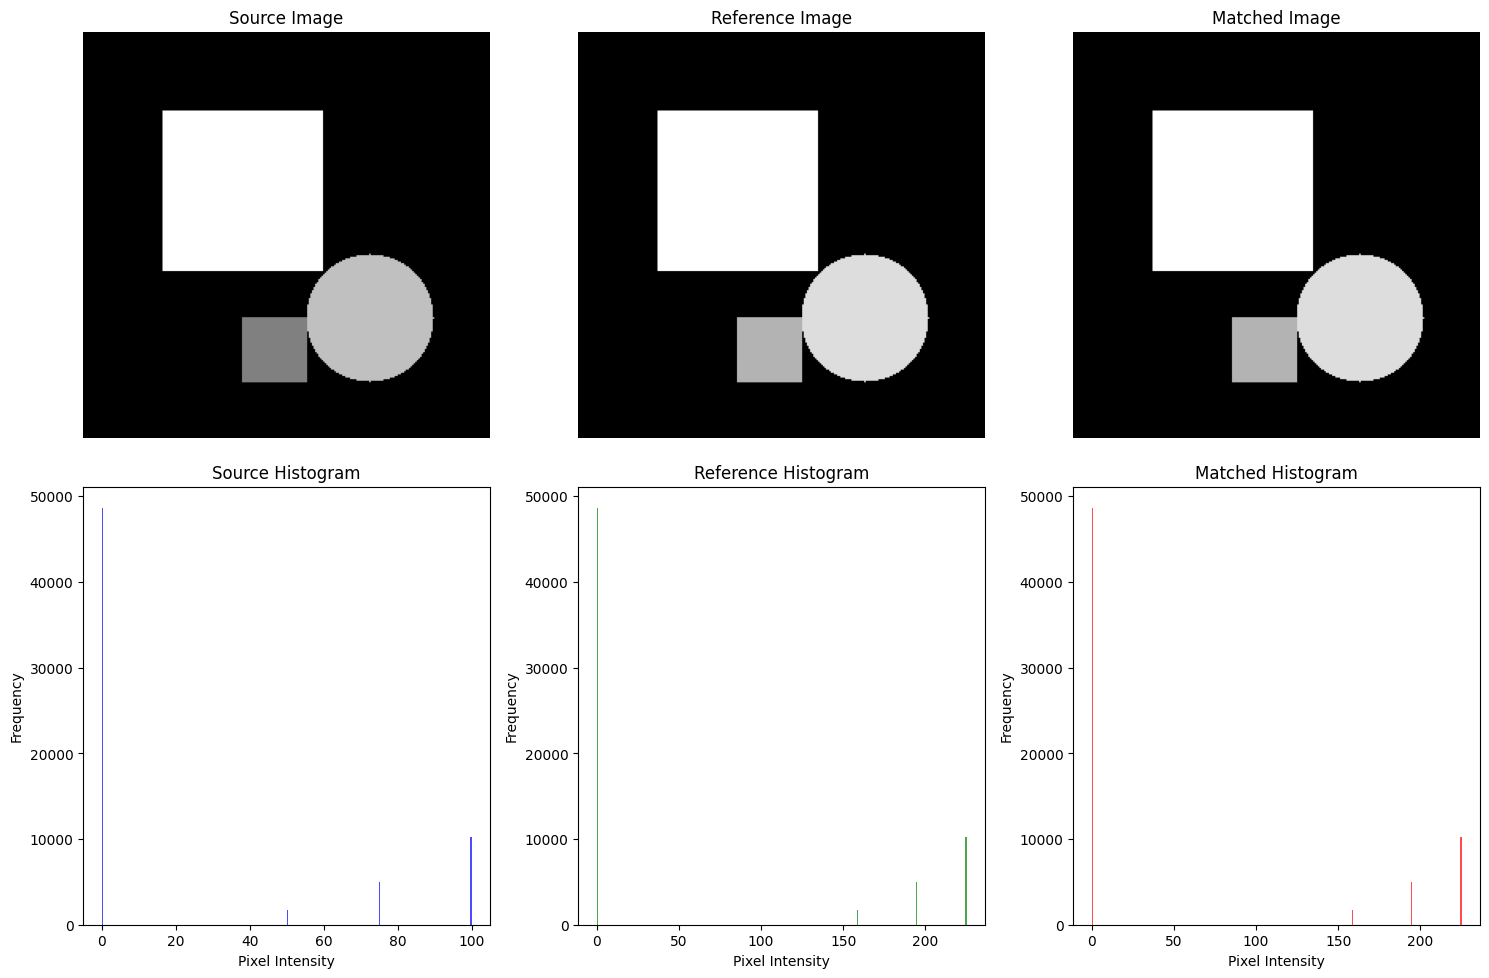

In [112]:
def histogram_matching(source, reference):
    """Match histogram of source to reference"""
    matched = exposure.match_histograms(source, reference)
    return matched.astype(np.uint8)

# Create source and reference images
source_img = create_sample_image()
# Make source darker
source_img = (source_img * 0.5).astype(np.uint8)

# Create reference with different intensity distribution
reference_img = create_sample_image()
reference_img = gamma_transform(reference_img, c=1, gamma=0.5)

# Match histograms
matched = histogram_matching(source_img, reference_img)

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(source_img, cmap='gray')
axes[0, 0].set_title('Source Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(reference_img, cmap='gray')
axes[0, 1].set_title('Reference Image')
axes[0, 1].axis('off')

axes[0, 2].imshow(matched, cmap='gray')
axes[0, 2].set_title('Matched Image')
axes[0, 2].axis('off')

axes[1, 0].hist(source_img.ravel(), bins=256, color='blue', alpha=0.7)
axes[1, 0].set_title('Source Histogram')
axes[1, 0].set_xlabel('Pixel Intensity')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(reference_img.ravel(), bins=256, color='green', alpha=0.7)
axes[1, 1].set_title('Reference Histogram')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

axes[1, 2].hist(matched.ravel(), bins=256, color='red', alpha=0.7)
axes[1, 2].set_title('Matched Histogram')
axes[1, 2].set_xlabel('Pixel Intensity')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

---
## Experiment 10: Smoothing Filters
1. Averaging filter (un-weighted)
2. Weighted filter
3. Gaussian filter

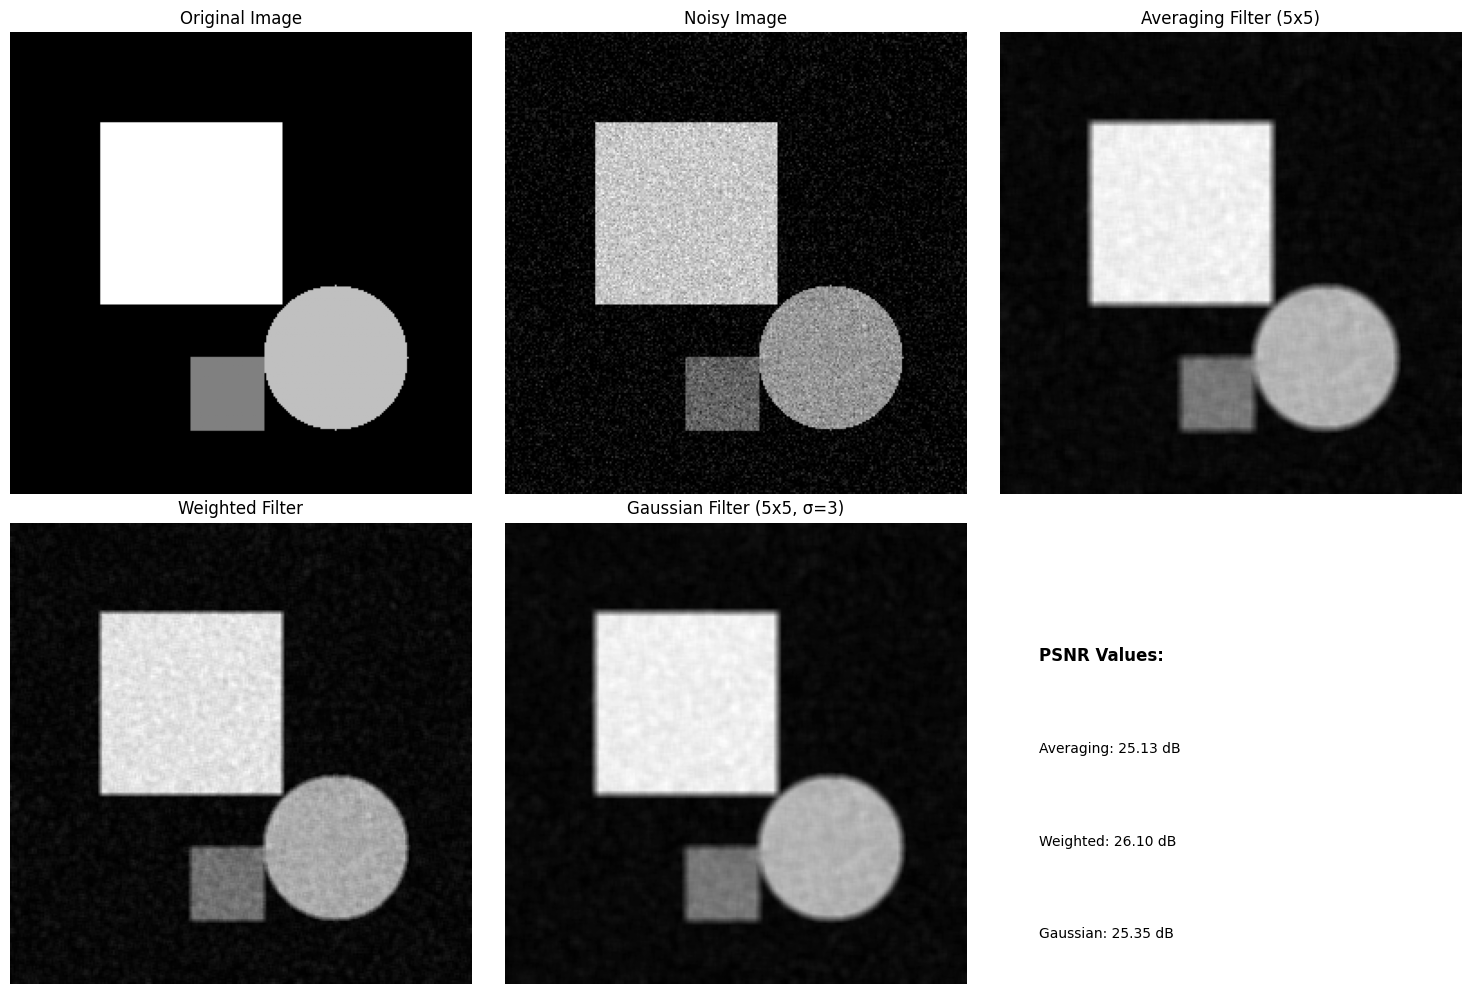

In [113]:
def averaging_filter(img, kernel_size=3):
    """Apply averaging filter"""
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)
    smoothed = cv2.filter2D(img, -1, kernel)
    return smoothed

def weighted_filter(img):
    """Apply weighted filter: h(x,y) = max(|x|, |y|)"""
    # Create 3x3 weighted kernel
    kernel = np.array([[2, 2, 2],
                      [2, 1, 2],
                      [2, 2, 2]], dtype=np.float32)
    kernel = kernel / kernel.sum()
    smoothed = cv2.filter2D(img, -1, kernel)
    return smoothed

def gaussian_filter_custom(img, kernel_size=5, sigma=1.0):
    """Apply Gaussian filter"""
    smoothed = cv2.GaussianBlur(img, (kernel_size, kernel_size), sigma)
    return smoothed

# Create noisy image
img = create_sample_image()
noise = np.random.normal(0, 20, img.shape)
noisy_img = np.clip(img + noise, 0, 255).astype(np.uint8)

# Apply filters
avg_filtered = averaging_filter(noisy_img, kernel_size=5)
weighted_filtered = weighted_filter(noisy_img)
gaussian_filtered = gaussian_filter_custom(noisy_img, kernel_size=5, sigma=3)

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(noisy_img, cmap='gray')
axes[0, 1].set_title('Noisy Image')
axes[0, 1].axis('off')

axes[0, 2].imshow(avg_filtered, cmap='gray')
axes[0, 2].set_title('Averaging Filter (5x5)')
axes[0, 2].axis('off')

axes[1, 0].imshow(weighted_filtered, cmap='gray')
axes[1, 0].set_title('Weighted Filter')
axes[1, 0].axis('off')

axes[1, 1].imshow(gaussian_filtered, cmap='gray')
axes[1, 1].set_title('Gaussian Filter (5x5, σ=3)')
axes[1, 1].axis('off')

# Calculate PSNR for comparison
psnr_avg = psnr(img, avg_filtered)
psnr_weighted = psnr(img, weighted_filtered)
psnr_gaussian = psnr(img, gaussian_filtered)

axes[1, 2].text(0.1, 0.7, f'PSNR Values:', fontsize=12, weight='bold')
axes[1, 2].text(0.1, 0.5, f'Averaging: {psnr_avg:.2f} dB', fontsize=10)
axes[1, 2].text(0.1, 0.3, f'Weighted: {psnr_weighted:.2f} dB', fontsize=10)
axes[1, 2].text(0.1, 0.1, f'Gaussian: {psnr_gaussian:.2f} dB', fontsize=10)
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

---
## Experiment 11: Sharpening Filters
1. Laplacian filter
2. Sobel edge detector
3. Canny edge detector
4. Unsharp masking

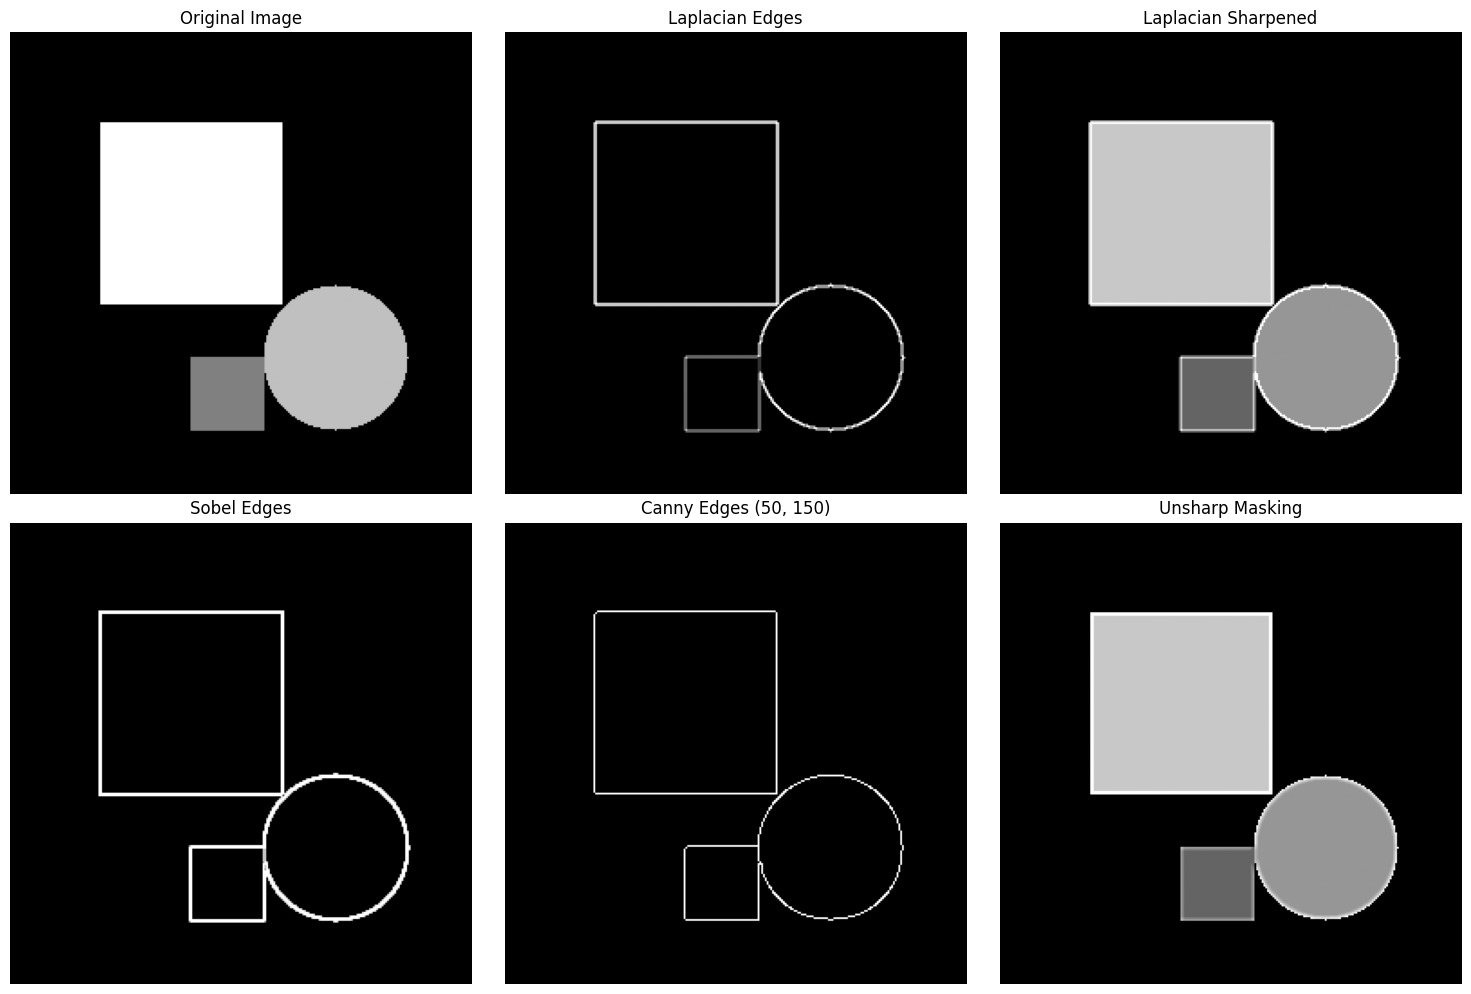

In [114]:
def laplacian_filter(img):
    """Apply Laplacian filter for edge detection"""
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    laplacian = np.abs(laplacian)
    laplacian = np.clip(laplacian, 0, 255).astype(np.uint8)
    # Sharpen by adding to original
    sharpened = cv2.add(img, laplacian)
    return laplacian, sharpened

def sobel_filter(img):
    """Apply Sobel filter for gradient-based edge detection"""
    # Calculate gradients
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    # Compute magnitude
    sobel = np.sqrt(sobelx**2 + sobely**2)
    sobel = np.clip(sobel, 0, 255).astype(np.uint8)
    return sobel

def canny_filter(img, threshold1=50, threshold2=150):
    """Apply Canny edge detector"""
    edges = cv2.Canny(img, threshold1, threshold2)
    return edges

def unsharp_masking(img, kernel_size=5, sigma=3, amount=1.5):
    """Apply unsharp masking for sharpening"""
    # Create blurred version
    blurred = cv2.GaussianBlur(img, (kernel_size, kernel_size), sigma)
    # Create mask (original - blurred)
    mask = cv2.subtract(img, blurred)
    # Add mask to original with amount factor
    sharpened = cv2.addWeighted(img, 1.0, mask, amount, 0)
    return sharpened

# Test the functions
img = create_sample_image()

laplacian_edges, laplacian_sharp = laplacian_filter(img)
sobel_edges = sobel_filter(img)
canny_edges = canny_filter(img)
unsharp = unsharp_masking(img)

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(laplacian_edges, cmap='gray')
axes[0, 1].set_title('Laplacian Edges')
axes[0, 1].axis('off')

axes[0, 2].imshow(laplacian_sharp, cmap='gray')
axes[0, 2].set_title('Laplacian Sharpened')
axes[0, 2].axis('off')

axes[1, 0].imshow(sobel_edges, cmap='gray')
axes[1, 0].set_title('Sobel Edges')
axes[1, 0].axis('off')

axes[1, 1].imshow(canny_edges, cmap='gray')
axes[1, 1].set_title('Canny Edges (50, 150)')
axes[1, 1].axis('off')

axes[1, 2].imshow(unsharp, cmap='gray')
axes[1, 2].set_title('Unsharp Masking')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

---
## Experiment 12: Generate Different Types of Noise
Compare generated noise with built-in imnoise function

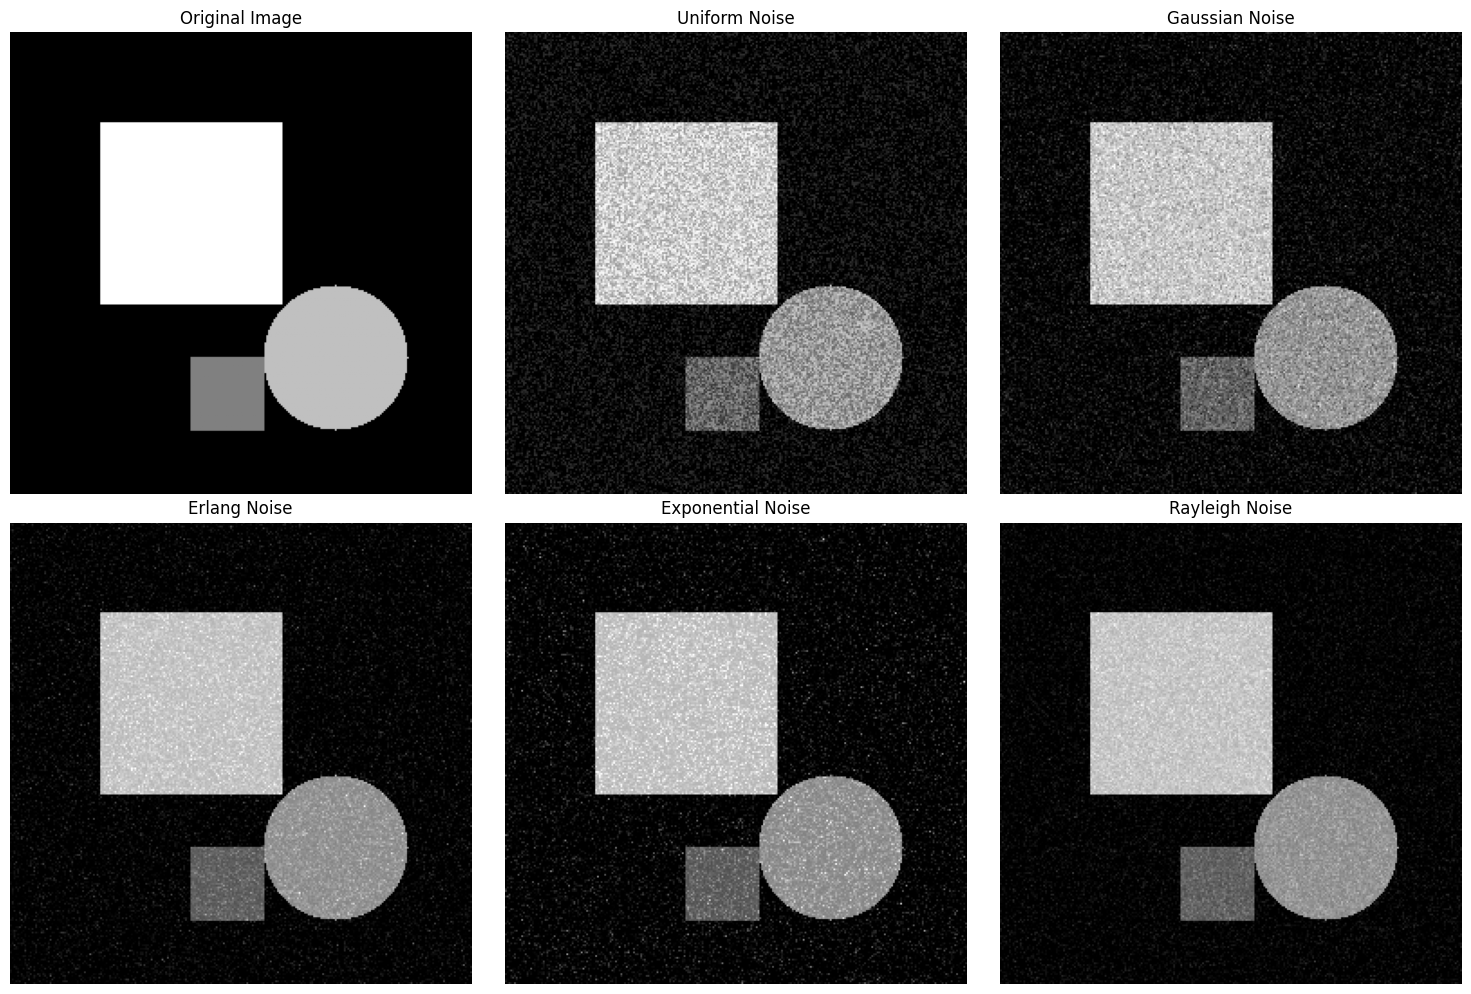

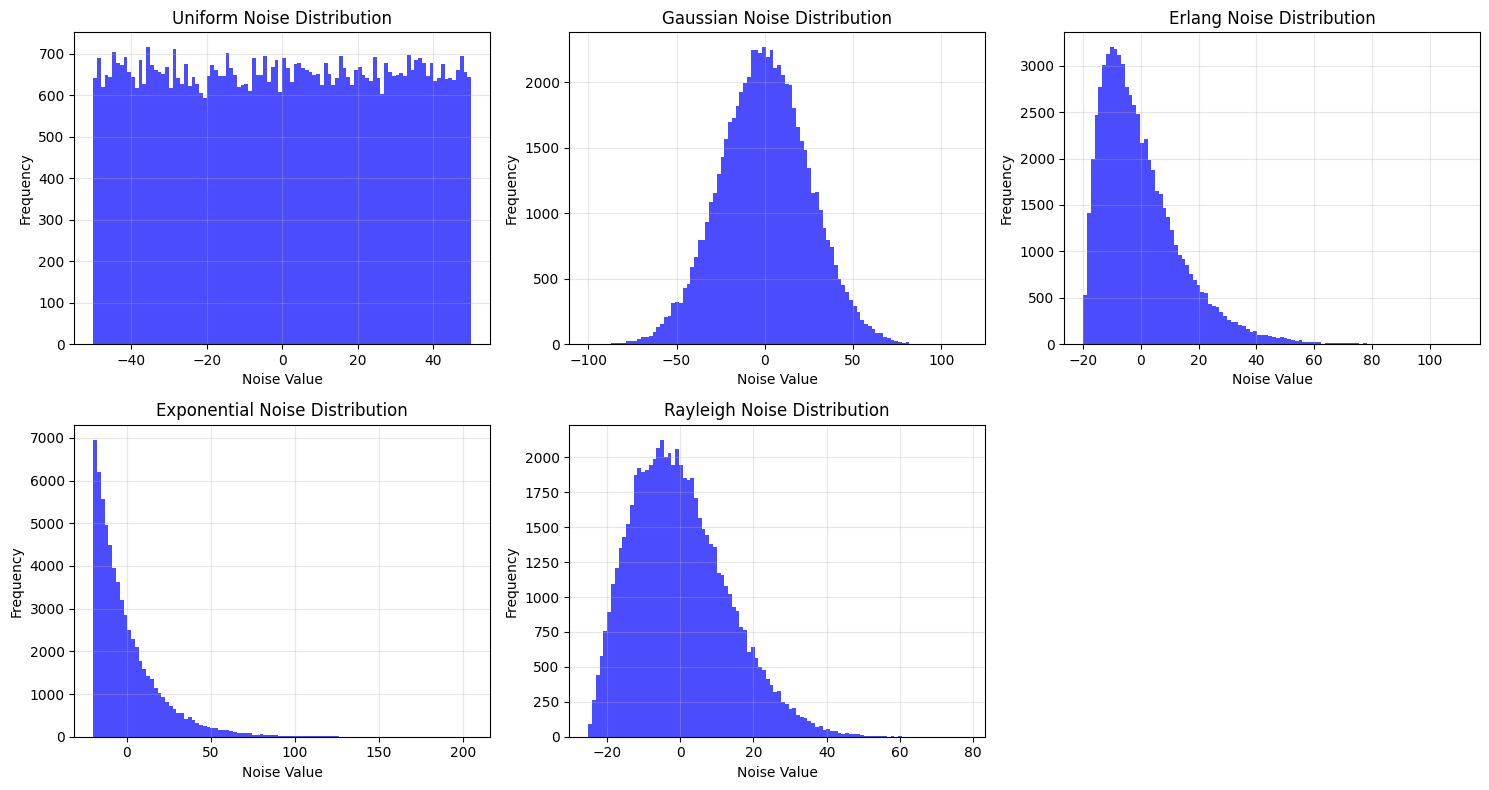

In [115]:
def add_uniform_noise(img, low=-50, high=50):
    """Add uniform noise"""
    noise = np.random.uniform(low, high, img.shape)
    noisy = np.clip(img + noise, 0, 255).astype(np.uint8)
    return noisy, noise

def add_gaussian_noise(img, mean=0, std=25):
    """Add Gaussian noise"""
    noise = np.random.normal(mean, std, img.shape)
    noisy = np.clip(img + noise, 0, 255).astype(np.uint8)
    return noisy, noise

def add_erlang_noise(img, k=2, scale=10):
    """Add Erlang (Gamma) noise"""
    noise = np.random.gamma(k, scale, img.shape) - k * scale
    noisy = np.clip(img + noise, 0, 255).astype(np.uint8)
    return noisy, noise

def add_exponential_noise(img, scale=20):
    """Add Exponential noise"""
    noise = np.random.exponential(scale, img.shape) - scale
    noisy = np.clip(img + noise, 0, 255).astype(np.uint8)
    return noisy, noise

def add_rayleigh_noise(img, scale=20):
    """Add Rayleigh noise"""
    noise = np.random.rayleigh(scale, img.shape) - scale * np.sqrt(np.pi / 2)
    noisy = np.clip(img + noise, 0, 255).astype(np.uint8)
    return noisy, noise

# Generate noisy images
img = create_sample_image()

uniform_noisy, uniform_noise = add_uniform_noise(img)
gaussian_noisy, gaussian_noise = add_gaussian_noise(img)
erlang_noisy, erlang_noise = add_erlang_noise(img)
exponential_noisy, exponential_noise = add_exponential_noise(img)
rayleigh_noisy, rayleigh_noise = add_rayleigh_noise(img)

# Display noisy images
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(uniform_noisy, cmap='gray')
axes[0, 1].set_title('Uniform Noise')
axes[0, 1].axis('off')

axes[0, 2].imshow(gaussian_noisy, cmap='gray')
axes[0, 2].set_title('Gaussian Noise')
axes[0, 2].axis('off')

axes[1, 0].imshow(erlang_noisy, cmap='gray')
axes[1, 0].set_title('Erlang Noise')
axes[1, 0].axis('off')

axes[1, 1].imshow(exponential_noisy, cmap='gray')
axes[1, 1].set_title('Exponential Noise')
axes[1, 1].axis('off')

axes[1, 2].imshow(rayleigh_noisy, cmap='gray')
axes[1, 2].set_title('Rayleigh Noise')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# Display histograms of noise distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

noise_types = [
    ('Uniform', uniform_noise),
    ('Gaussian', gaussian_noise),
    ('Erlang', erlang_noise),
    ('Exponential', exponential_noise),
    ('Rayleigh', rayleigh_noise)
]

for idx, (name, noise) in enumerate(noise_types):
    row = idx // 3
    col = idx % 3
    axes[row, col].hist(noise.ravel(), bins=100, alpha=0.7, color='blue')
    axes[row, col].set_title(f'{name} Noise Distribution')
    axes[row, col].set_xlabel('Noise Value')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].grid(True, alpha=0.3)

axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

---
## Experiment 13: Local Binary Pattern (LBP)
Implement local binary pattern on grayscale image

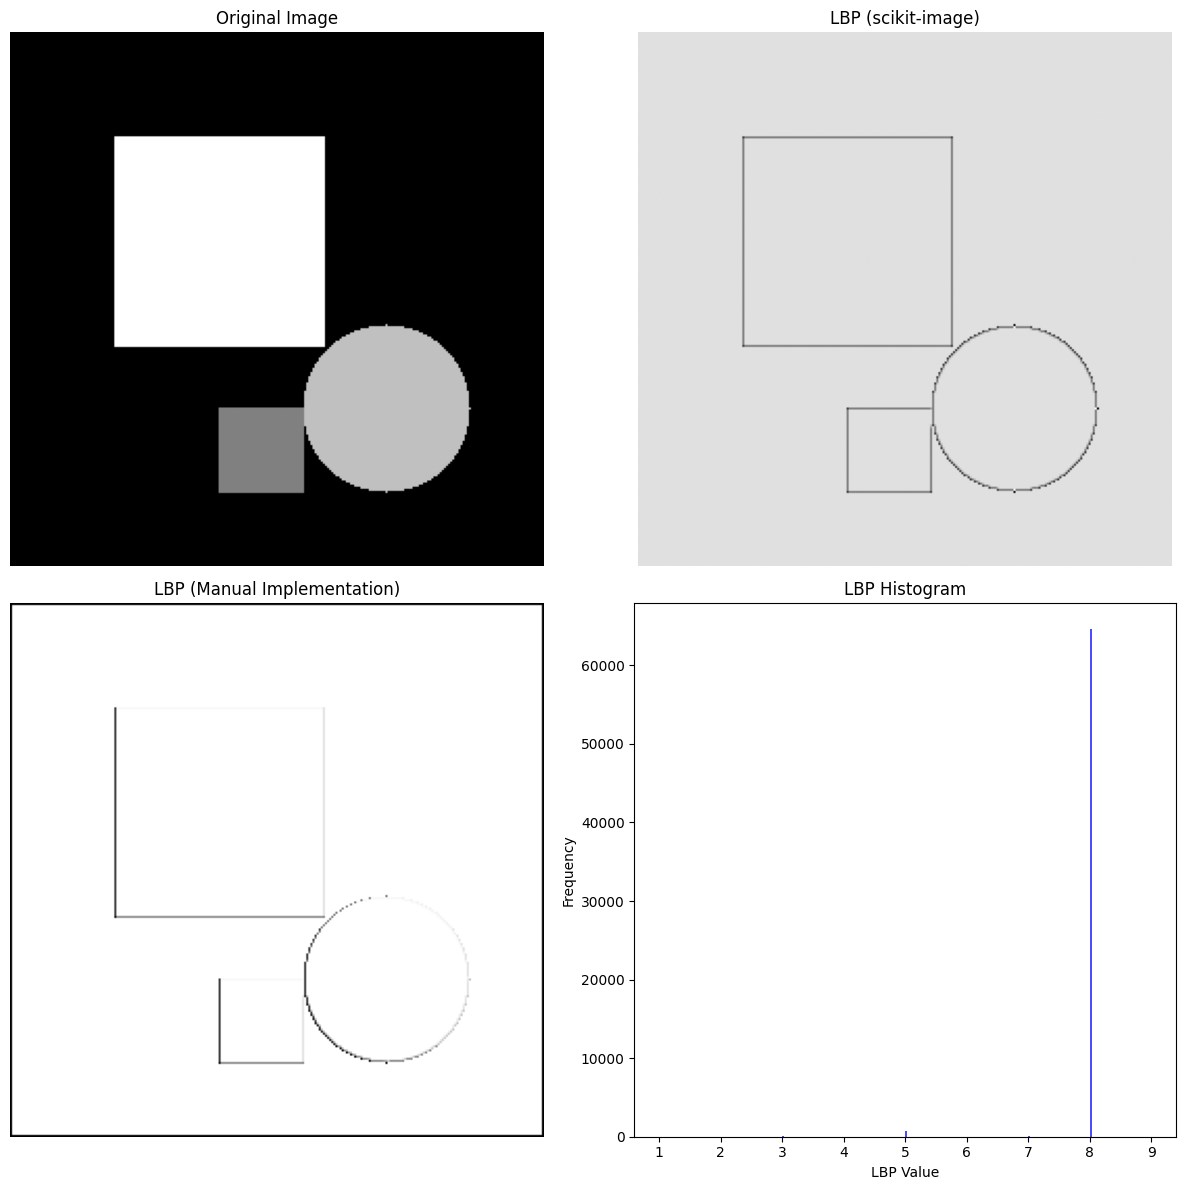

LBP image range: 1 to 9
Number of unique patterns: 7


In [116]:
def local_binary_pattern(img, radius=1, n_points=8):
    """Compute Local Binary Pattern"""
    from skimage.feature import local_binary_pattern as lbp
    lbp_img = lbp(img, n_points, radius, method='uniform')
    return lbp_img

def manual_lbp(img):
    """Manual implementation of basic LBP (3x3 neighborhood)"""
    height, width = img.shape
    lbp_img = np.zeros_like(img)
    
    for i in range(1, height-1):
        for j in range(1, width-1):
            center = img[i, j]
            code = 0
            
            # Check 8 neighbors in clockwise direction
            neighbors = [
                img[i-1, j-1], img[i-1, j], img[i-1, j+1],
                img[i, j+1], img[i+1, j+1], img[i+1, j],
                img[i+1, j-1], img[i, j-1]
            ]
            
            for k, neighbor in enumerate(neighbors):
                if neighbor >= center:
                    code |= (1 << k)
            
            lbp_img[i, j] = code
    
    return lbp_img

# Test the function
img = create_sample_image()

# Using scikit-image
lbp_ski = local_binary_pattern(img, radius=1, n_points=8)

# Manual implementation
lbp_manual = manual_lbp(img)

# Display results
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(lbp_ski, cmap='gray')
axes[0, 1].set_title('LBP (scikit-image)')
axes[0, 1].axis('off')

axes[1, 0].imshow(lbp_manual, cmap='gray')
axes[1, 0].set_title('LBP (Manual Implementation)')
axes[1, 0].axis('off')

axes[1, 1].hist(lbp_ski.ravel(), bins=256, alpha=0.7, color='blue')
axes[1, 1].set_title('LBP Histogram')
axes[1, 1].set_xlabel('LBP Value')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"LBP image range: {lbp_ski.min():.0f} to {lbp_ski.max():.0f}")
print(f"Number of unique patterns: {len(np.unique(lbp_ski))}")

---
## Experiment 14: Denoise Using Various Filters
Denoise image corrupted by Gaussian and Speckle noise using:
- Weiner filter
- Median filter
- Gaussian filter
- Bilateral filter

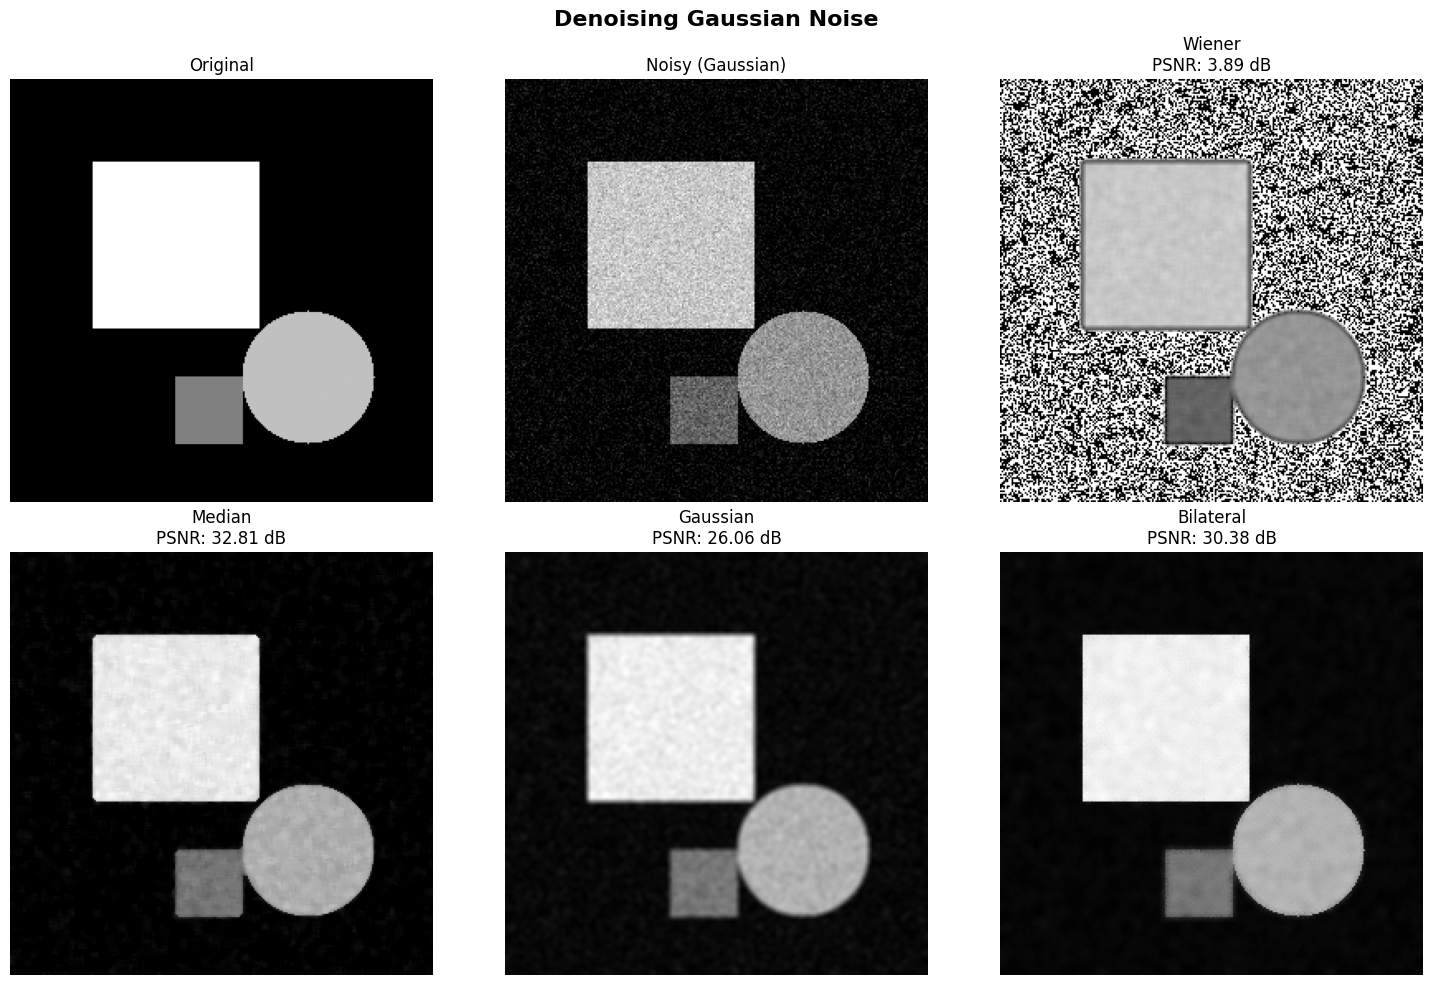

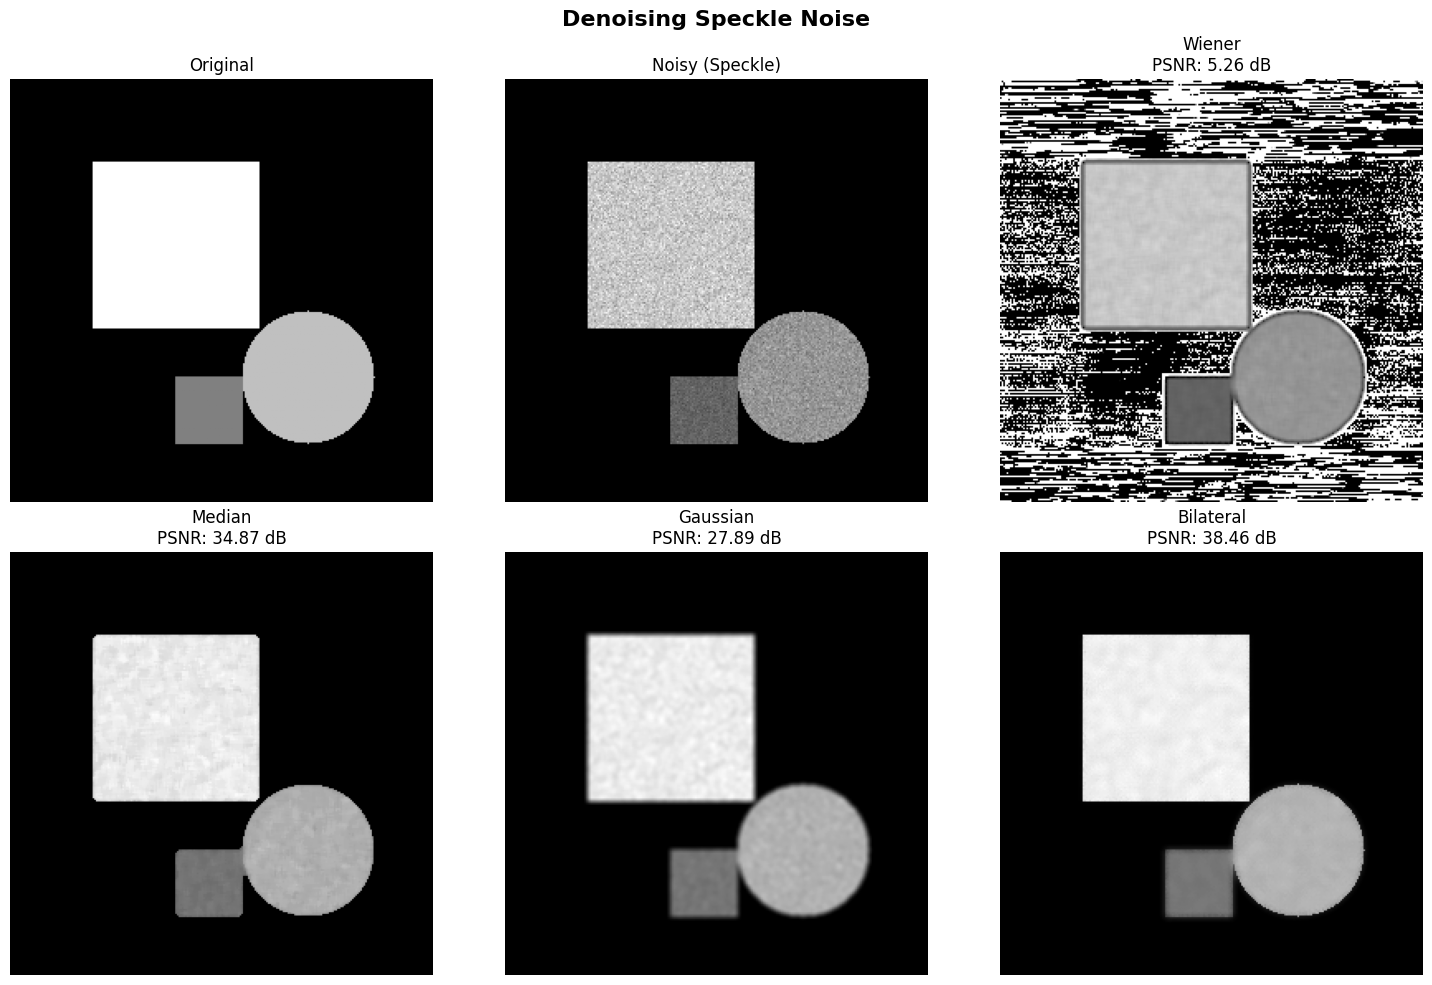


Gaussian Noise - PSNR Comparison:
Wiener      : 3.89 dB
Median      : 32.81 dB
Gaussian    : 26.06 dB
Bilateral   : 30.38 dB

Speckle Noise - PSNR Comparison:
Wiener      : 5.26 dB
Median      : 34.87 dB
Gaussian    : 27.89 dB
Bilateral   : 38.46 dB


In [117]:
def add_speckle_noise(img, variance=0.05):
    """Add speckle (multiplicative) noise"""
    noise = np.random.randn(*img.shape) * variance
    noisy = img + img * noise
    return np.clip(noisy, 0, 255).astype(np.uint8)

def wiener_filter(img, kernel_size=5, noise_variance=None):
    """Apply Wiener filter (simplified version)"""
    from scipy.signal import wiener
    if noise_variance is None:
        filtered = wiener(img, (kernel_size, kernel_size))
    else:
        filtered = wiener(img, (kernel_size, kernel_size), noise_variance)
    return np.clip(filtered, 0, 255).astype(np.uint8)

# Create noisy images
img = create_sample_image()

# Add Gaussian noise
gaussian_noisy, _ = add_gaussian_noise(img, mean=0, std=20)

# Add Speckle noise
speckle_noisy = add_speckle_noise(img, variance=0.1)

# Apply filters to Gaussian noisy image
gaussian_denoised = {
    'Wiener': wiener_filter(gaussian_noisy, kernel_size=5),
    'Median': median_filter(gaussian_noisy, size=5),
    'Gaussian': cv2.GaussianBlur(gaussian_noisy, (5, 5), 1.5),
    'Bilateral': cv2.bilateralFilter(gaussian_noisy, 9, 75, 75)
}

# Apply filters to Speckle noisy image
speckle_denoised = {
    'Wiener': wiener_filter(speckle_noisy, kernel_size=5),
    'Median': median_filter(speckle_noisy, size=5),
    'Gaussian': cv2.GaussianBlur(speckle_noisy, (5, 5), 1.5),
    'Bilateral': cv2.bilateralFilter(speckle_noisy, 9, 75, 75)
}

# Display results for Gaussian noise
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Denoising Gaussian Noise', fontsize=16, fontweight='bold')

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(gaussian_noisy, cmap='gray')
axes[0, 1].set_title('Noisy (Gaussian)')
axes[0, 1].axis('off')

for idx, (name, denoised) in enumerate(gaussian_denoised.items()):
    row = (idx + 2) // 3
    col = (idx + 2) % 3
    axes[row, col].imshow(denoised, cmap='gray')
    psnr_val = psnr(img, denoised)
    axes[row, col].set_title(f'{name}\nPSNR: {psnr_val:.2f} dB')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Display results for Speckle noise
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Denoising Speckle Noise', fontsize=16, fontweight='bold')

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(speckle_noisy, cmap='gray')
axes[0, 1].set_title('Noisy (Speckle)')
axes[0, 1].axis('off')

for idx, (name, denoised) in enumerate(speckle_denoised.items()):
    row = (idx + 2) // 3
    col = (idx + 2) % 3
    axes[row, col].imshow(denoised, cmap='gray')
    psnr_val = psnr(img, denoised)
    axes[row, col].set_title(f'{name}\nPSNR: {psnr_val:.2f} dB')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Print PSNR comparison
print("\nGaussian Noise - PSNR Comparison:")
for name, denoised in gaussian_denoised.items():
    print(f"{name:12s}: {psnr(img, denoised):.2f} dB")

print("\nSpeckle Noise - PSNR Comparison:")
for name, denoised in speckle_denoised.items():
    print(f"{name:12s}: {psnr(img, denoised):.2f} dB")

---
## Experiment 15: Adaptive Median Filter
Implement adaptive median filter with PSNR comparison

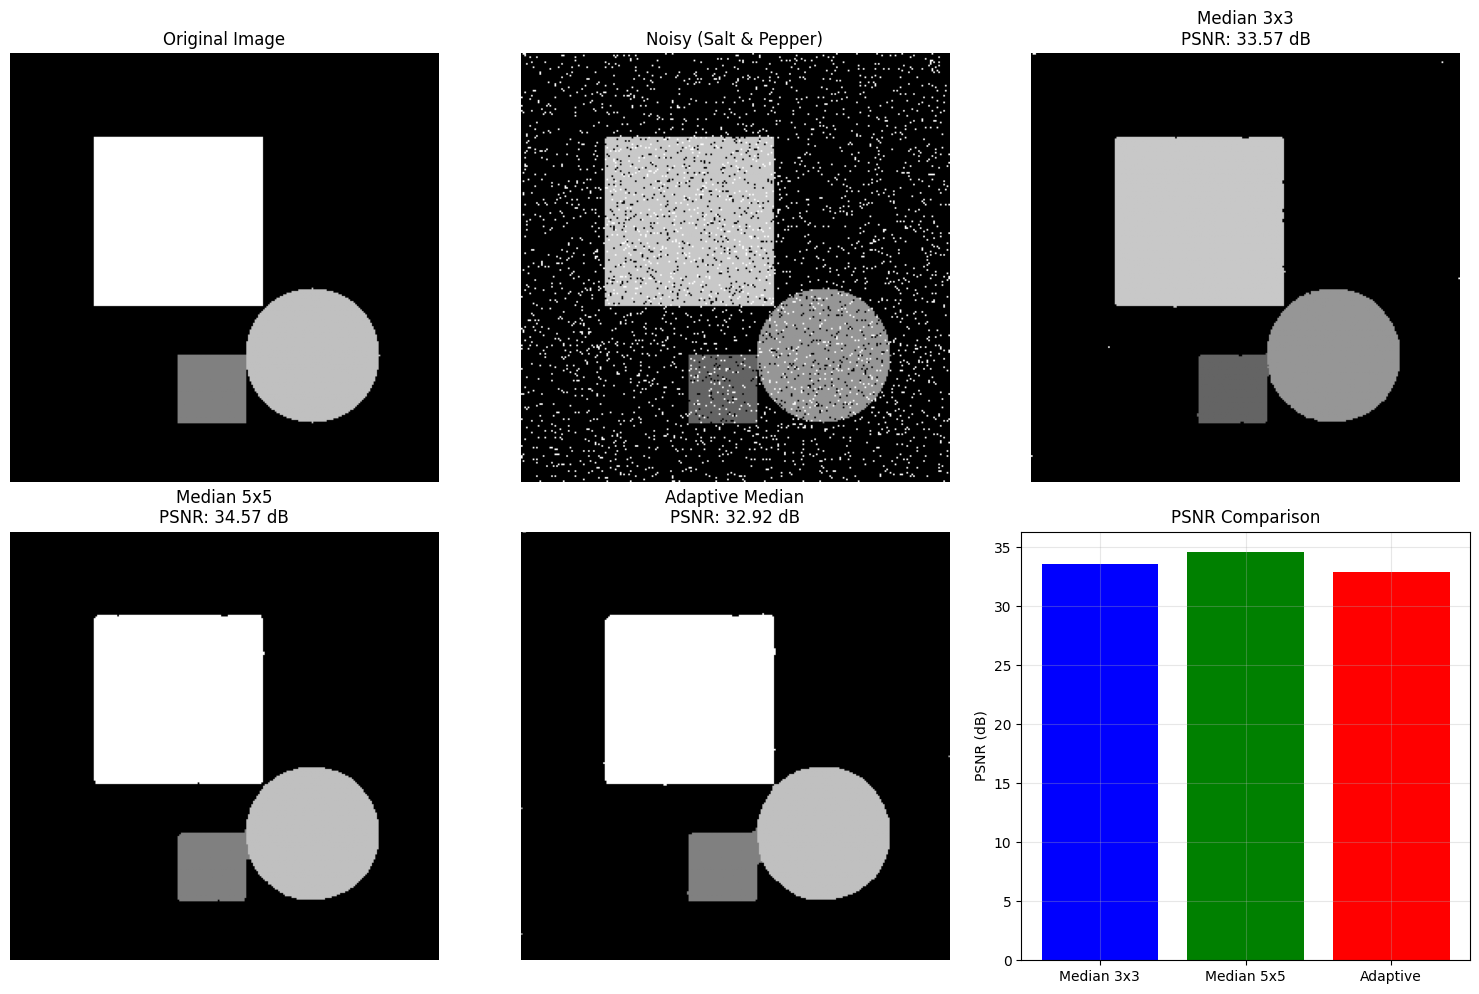


PSNR Comparison:
Median 3x3:        33.57 dB
Median 5x5:        34.57 dB
Adaptive Median:   32.92 dB



In [118]:
def adaptive_median_filter(img, initial_window=3, max_window=7):
    """Apply adaptive median filter
    Increases window size if median is min or max in current window
    """
    height, width = img.shape
    output = np.copy(img)
    
    for i in range(height):
        for j in range(width):
            window_size = initial_window
            
            while window_size <= max_window:
                half_window = window_size // 2
                
                # Define window boundaries
                row_min = max(0, i - half_window)
                row_max = min(height, i + half_window + 1)
                col_min = max(0, j - half_window)
                col_max = min(width, j + half_window + 1)
                
                # Extract window
                window = img[row_min:row_max, col_min:col_max]
                
                # Calculate statistics
                z_min = np.min(window)
                z_max = np.max(window)
                z_med = np.median(window)
                z_xy = img[i, j]
                
                # Level A: Check if median is impulse
                if z_min < z_med < z_max:
                    # Level B: Check if current pixel is impulse
                    if z_min < z_xy < z_max:
                        output[i, j] = z_xy
                    else:
                        output[i, j] = z_med
                    break
                else:
                    window_size += 2
                    
                if window_size > max_window:
                    output[i, j] = z_med
    
    return output.astype(np.uint8)

# Create noisy image with salt and pepper noise
img = create_sample_image()

# Add salt and pepper noise
def add_salt_pepper_noise(img, prob=0.05):
    noisy = np.copy(img)
    # Salt (white pixels)
    salt_mask = np.random.random(img.shape) < prob/2
    noisy[salt_mask] = 255
    # Pepper (black pixels)
    pepper_mask = np.random.random(img.shape) < prob/2
    noisy[pepper_mask] = 0
    return noisy

noisy_img = add_salt_pepper_noise(img, prob=0.1)

# Apply standard median filter
median_3x3 = median_filter(noisy_img, size=3)
median_5x5 = median_filter(noisy_img, size=5)

# Apply adaptive median filter
adaptive_filtered = adaptive_median_filter(noisy_img, initial_window=3, max_window=7)

# Calculate PSNR
psnr_median_3 = psnr(img, median_3x3)
psnr_median_5 = psnr(img, median_5x5)
psnr_adaptive = psnr(img, adaptive_filtered)

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(noisy_img, cmap='gray')
axes[0, 1].set_title('Noisy (Salt & Pepper)')
axes[0, 1].axis('off')

axes[0, 2].imshow(median_3x3, cmap='gray')
axes[0, 2].set_title(f'Median 3x3\nPSNR: {psnr_median_3:.2f} dB')
axes[0, 2].axis('off')

axes[1, 0].imshow(median_5x5, cmap='gray')
axes[1, 0].set_title(f'Median 5x5\nPSNR: {psnr_median_5:.2f} dB')
axes[1, 0].axis('off')

axes[1, 1].imshow(adaptive_filtered, cmap='gray')
axes[1, 1].set_title(f'Adaptive Median\nPSNR: {psnr_adaptive:.2f} dB')
axes[1, 1].axis('off')

# PSNR comparison
axes[1, 2].bar(['Median 3x3', 'Median 5x5', 'Adaptive'], 
               [psnr_median_3, psnr_median_5, psnr_adaptive],
               color=['blue', 'green', 'red'])
axes[1, 2].set_ylabel('PSNR (dB)')
axes[1, 2].set_title('PSNR Comparison')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nPSNR Comparison:")
print(f"Median 3x3:        {psnr_median_3:.2f} dB")
print(f"Median 5x5:        {psnr_median_5:.2f} dB")
print(f"Adaptive Median:   {psnr_adaptive:.2f} dB")
print(f"\nAdaptive median filter performs better!" if psnr_adaptive > max(psnr_median_3, psnr_median_5) else "")

---
## Experiment 16: Otsu's Global Threshold
Segment grayscale image using Otsu's thresholding

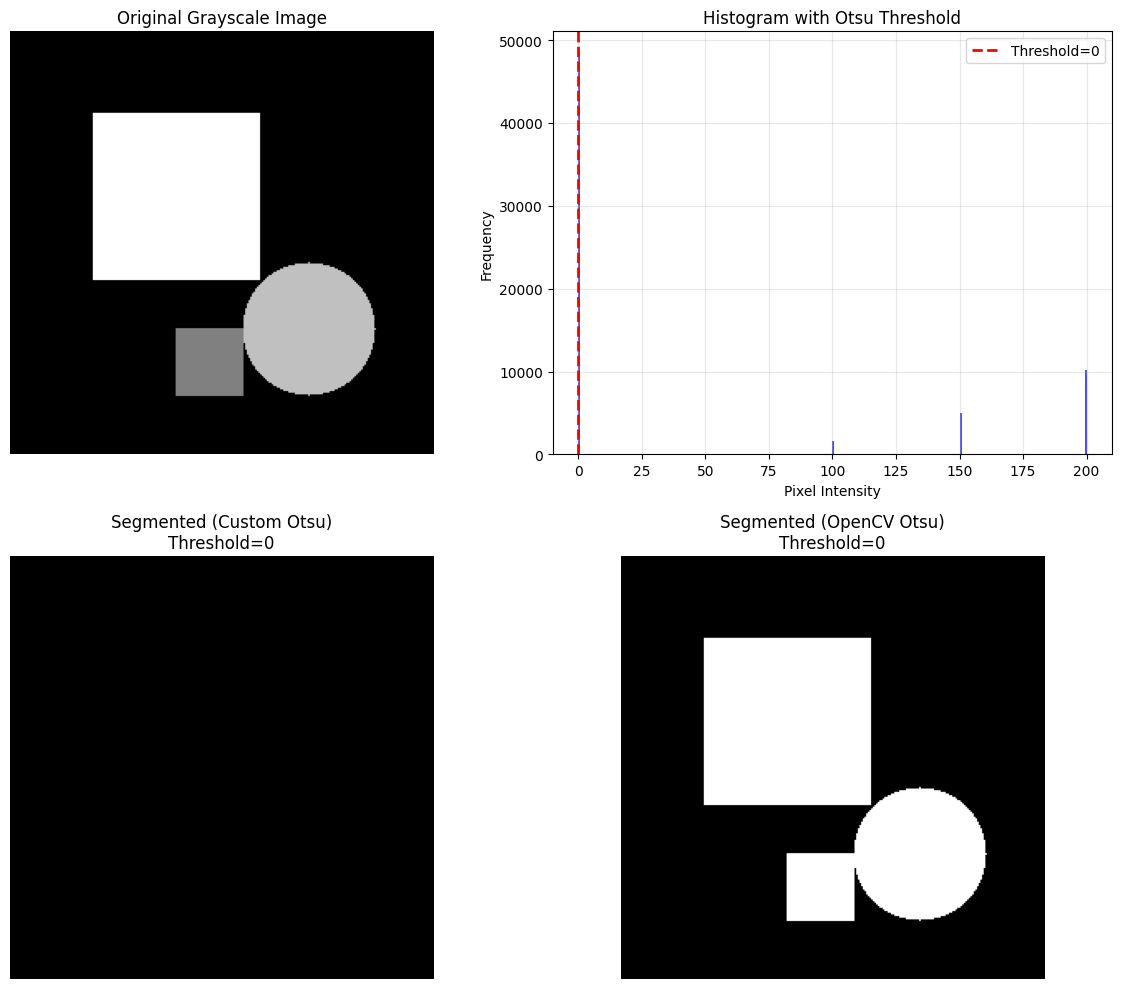

Custom Otsu threshold: 0
OpenCV Otsu threshold: 0


In [119]:
def otsu_threshold(img):
    """Compute Otsu's optimal threshold"""
    # Calculate histogram
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    hist = hist.astype(float)
    
    # Total number of pixels
    total_pixels = img.size
    
    # Probability of each intensity
    prob = hist / total_pixels
    
    # Initialize variables
    max_variance = 0
    optimal_threshold = 0
    
    # Compute cumulative sums
    cumsum_prob = np.cumsum(prob)
    cumsum_mean = np.cumsum(prob * np.arange(256))
    global_mean = cumsum_mean[-1]
    
    # Find optimal threshold
    for t in range(256):
        # Weight of background
        w0 = cumsum_prob[t]
        # Weight of foreground
        w1 = 1 - w0
        
        if w0 == 0 or w1 == 0:
            continue
        
        # Mean of background
        mu0 = cumsum_mean[t] / w0 if w0 > 0 else 0
        # Mean of foreground
        mu1 = (global_mean - cumsum_mean[t]) / w1 if w1 > 0 else 0
        
        # Between-class variance
        variance = w0 * w1 * (mu0 - mu1) ** 2
        
        if variance > max_variance:
            max_variance = variance
            optimal_threshold = t
    
    return optimal_threshold

# Test the function
img = create_sample_image()

# Custom Otsu implementation
threshold_custom = otsu_threshold(img)
binary_custom = (img >= threshold_custom).astype(np.uint8) * 255

# OpenCV Otsu implementation
threshold_cv, binary_cv = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title('Original Grayscale Image')
axes[0, 0].axis('off')

axes[0, 1].hist(img.ravel(), bins=256, color='blue', alpha=0.7)
axes[0, 1].axvline(threshold_custom, color='red', linestyle='--', linewidth=2, label=f'Threshold={threshold_custom}')
axes[0, 1].set_title('Histogram with Otsu Threshold')
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].imshow(binary_custom, cmap='gray')
axes[1, 0].set_title(f'Segmented (Custom Otsu)\nThreshold={threshold_custom}')
axes[1, 0].axis('off')

axes[1, 1].imshow(binary_cv, cmap='gray')
axes[1, 1].set_title(f'Segmented (OpenCV Otsu)\nThreshold={int(threshold_cv)}')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print(f"Custom Otsu threshold: {threshold_custom}")
print(f"OpenCV Otsu threshold: {int(threshold_cv)}")

---
## Experiment 17: Confusion Matrix and Metrics
Compute metrics for 2x2 and 3x3 confusion matrices

Example 1: Binary Classification (2x2 Confusion Matrix)

Confusion Matrix:
                Predicted
              Negative  Positive
Actual Negative   85       15
       Positive   10       90

Metrics:
Accuracy    : 0.8750
Precision   : 0.8571
Recall      : 0.9000
F1-Score    : 0.8780
MCC         : 0.7509


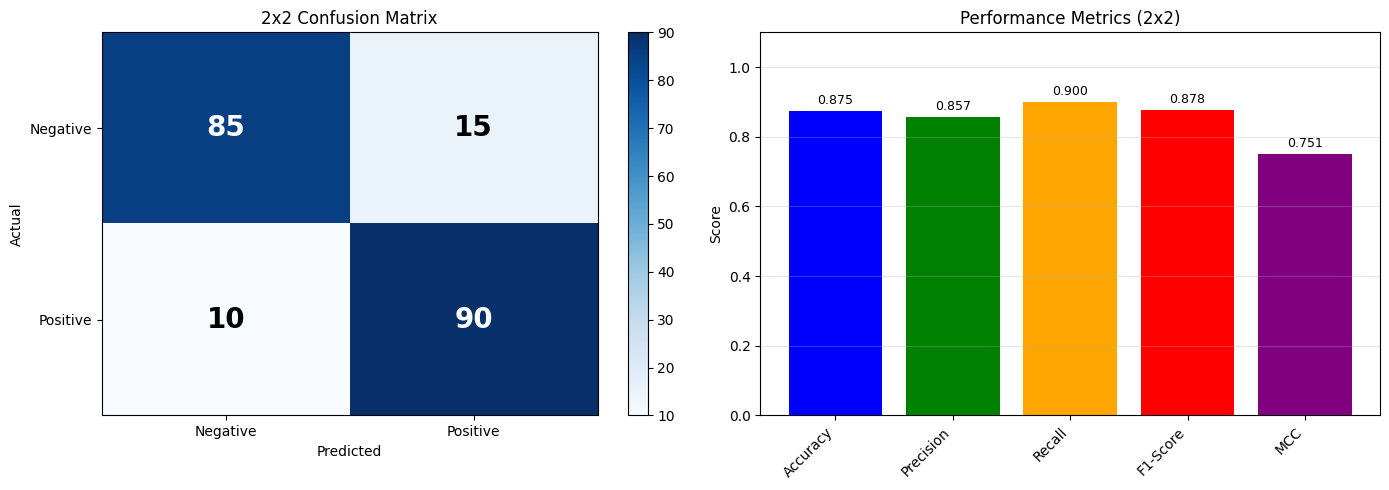


Example 2: Multi-class Classification (3x3 Confusion Matrix)

Confusion Matrix:
          Predicted
        Class0  Class1  Class2
Class0   80      10       5
Class1    8      85       7
Class2    5      12      88

Overall Metrics:
Accuracy            : 0.8433
Precision (macro)   : 0.8449
Recall (macro)      : 0.8434
F1-Score (macro)    : 0.8436
MCC                 : 0.7654

Per-Class Metrics:

Class 0:
  Precision: 0.8602
  Recall:    0.8421
  F1-Score:  0.8511

Class 1:
  Precision: 0.7944
  Recall:    0.8500
  F1-Score:  0.8213

Class 2:
  Precision: 0.8800
  Recall:    0.8381
  F1-Score:  0.8585


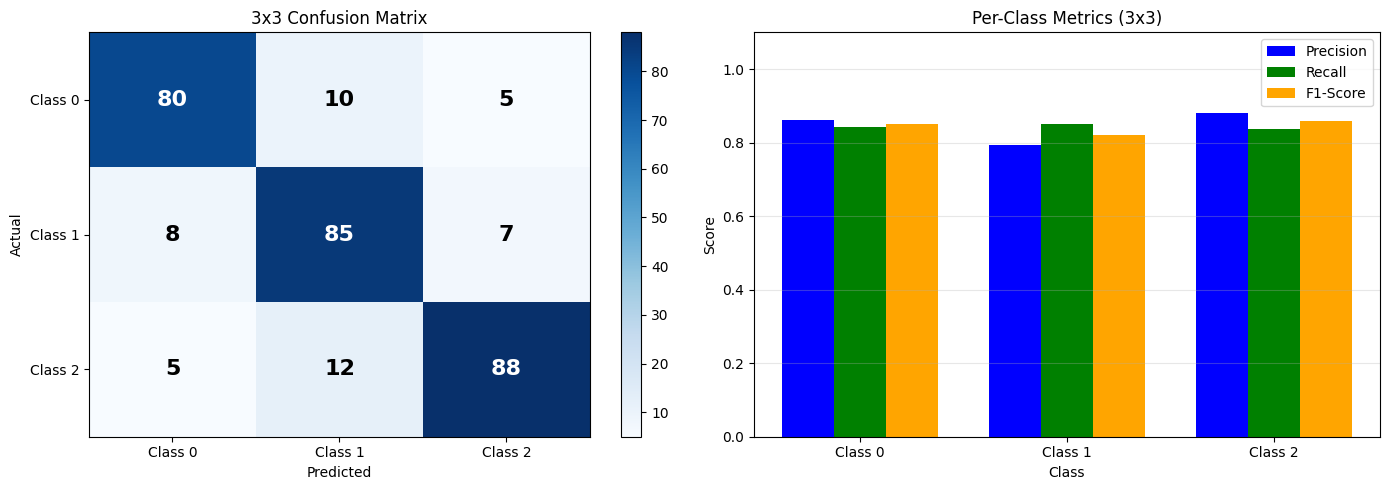

In [120]:
def compute_metrics_2x2(cm):
    """Compute metrics for 2x2 confusion matrix
    cm = [[TN, FP],
          [FN, TP]]
    """
    tn, fp = cm[0]
    fn, tp = cm[1]
    
    # Accuracy
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    # Recall (Sensitivity)
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    # F1-Score
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # MCC (Matthews Correlation Coefficient)
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    mcc = numerator / denominator if denominator > 0 else 0
    
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'MCC': mcc
    }

def compute_metrics_3x3(cm):
    """Compute metrics for 3x3 confusion matrix (multi-class)"""
    n_classes = cm.shape[0]
    metrics = {}
    
    # Overall accuracy
    accuracy = np.trace(cm) / np.sum(cm)
    metrics['Accuracy'] = accuracy
    
    # Per-class metrics
    precisions = []
    recalls = []
    f1_scores = []
    
    for i in range(n_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn
        
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
    
    # Macro averages
    metrics['Precision (macro)'] = np.mean(precisions)
    metrics['Recall (macro)'] = np.mean(recalls)
    metrics['F1-Score (macro)'] = np.mean(f1_scores)
    
    # MCC for multi-class
    n = np.sum(cm)
    t_k = np.sum(cm, axis=1)
    p_k = np.sum(cm, axis=0)
    c = np.trace(cm)
    s = np.sum(cm)
    
    numerator = c * s - np.dot(t_k, p_k)
    denominator = np.sqrt(s**2 - np.dot(p_k, p_k)) * np.sqrt(s**2 - np.dot(t_k, t_k))
    mcc = numerator / denominator if denominator > 0 else 0
    metrics['MCC'] = mcc
    
    return metrics, {'Precision': precisions, 'Recall': recalls, 'F1-Score': f1_scores}

# Example 1: 2x2 Confusion Matrix
print("="*60)
print("Example 1: Binary Classification (2x2 Confusion Matrix)")
print("="*60)

# Random 2x2 confusion matrix
np.random.seed(42)
cm_2x2 = np.array([[85, 15],
                   [10, 90]])

print("\nConfusion Matrix:")
print("                Predicted")
print("              Negative  Positive")
print(f"Actual Negative  {cm_2x2[0,0]:3d}      {cm_2x2[0,1]:3d}")
print(f"       Positive  {cm_2x2[1,0]:3d}      {cm_2x2[1,1]:3d}")

metrics_2x2 = compute_metrics_2x2(cm_2x2)

print("\nMetrics:")
for metric, value in metrics_2x2.items():
    print(f"{metric:12s}: {value:.4f}")

# Visualize 2x2
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion matrix heatmap
im1 = axes[0].imshow(cm_2x2, cmap='Blues', aspect='auto')
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xticklabels(['Negative', 'Positive'])
axes[0].set_yticklabels(['Negative', 'Positive'])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('2x2 Confusion Matrix')

# Add text annotations
for i in range(2):
    for j in range(2):
        axes[0].text(j, i, str(cm_2x2[i, j]), ha='center', va='center', 
                    color='white' if cm_2x2[i, j] > cm_2x2.max()/2 else 'black',
                    fontsize=20, weight='bold')

plt.colorbar(im1, ax=axes[0])

# Metrics bar chart
metrics_names = list(metrics_2x2.keys())
metrics_values = list(metrics_2x2.values())
axes[1].bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red', 'purple'])
axes[1].set_ylabel('Score')
axes[1].set_title('Performance Metrics (2x2)')
axes[1].set_ylim([0, 1.1])
axes[1].grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for i, v in enumerate(metrics_values):
    axes[1].text(i, v + 0.02, f'{v:.3f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Example 2: 3x3 Confusion Matrix
print("\n" + "="*60)
print("Example 2: Multi-class Classification (3x3 Confusion Matrix)")
print("="*60)

cm_3x3 = np.array([[80, 10, 5],
                   [8, 85, 7],
                   [5, 12, 88]])

print("\nConfusion Matrix:")
print("          Predicted")
print("        Class0  Class1  Class2")
for i, row in enumerate(cm_3x3):
    print(f"Class{i}  {row[0]:3d}     {row[1]:3d}     {row[2]:3d}")

metrics_3x3, per_class_3x3 = compute_metrics_3x3(cm_3x3)

print("\nOverall Metrics:")
for metric, value in metrics_3x3.items():
    print(f"{metric:20s}: {value:.4f}")

print("\nPer-Class Metrics:")
for i in range(3):
    print(f"\nClass {i}:")
    print(f"  Precision: {per_class_3x3['Precision'][i]:.4f}")
    print(f"  Recall:    {per_class_3x3['Recall'][i]:.4f}")
    print(f"  F1-Score:  {per_class_3x3['F1-Score'][i]:.4f}")

# Visualize 3x3
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion matrix heatmap
im2 = axes[0].imshow(cm_3x3, cmap='Blues', aspect='auto')
axes[0].set_xticks([0, 1, 2])
axes[0].set_yticks([0, 1, 2])
axes[0].set_xticklabels(['Class 0', 'Class 1', 'Class 2'])
axes[0].set_yticklabels(['Class 0', 'Class 1', 'Class 2'])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('3x3 Confusion Matrix')

# Add text annotations
for i in range(3):
    for j in range(3):
        axes[0].text(j, i, str(cm_3x3[i, j]), ha='center', va='center',
                    color='white' if cm_3x3[i, j] > cm_3x3.max()/2 else 'black',
                    fontsize=16, weight='bold')

plt.colorbar(im2, ax=axes[0])

# Per-class metrics
x = np.arange(3)
width = 0.25
axes[1].bar(x - width, per_class_3x3['Precision'], width, label='Precision', color='blue')
axes[1].bar(x, per_class_3x3['Recall'], width, label='Recall', color='green')
axes[1].bar(x + width, per_class_3x3['F1-Score'], width, label='F1-Score', color='orange')
axes[1].set_ylabel('Score')
axes[1].set_xlabel('Class')
axes[1].set_title('Per-Class Metrics (3x3)')
axes[1].set_xticks(x)
axes[1].set_xticklabels(['Class 0', 'Class 1', 'Class 2'])
axes[1].set_ylim([0, 1.1])
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

---
## Experiment 18: CNN Basics - Individual Components
Implement basic CNN ingredients with random 3x3 matrices

In [121]:
import torch
import torch.nn as nn
import torch.nn.functional as F

print("PyTorch version:", torch.__version__)

# Create random 3x3 matrices for demonstrations
np.random.seed(42)
torch.manual_seed(42)

# Sample input (3x3 single channel)
sample_input = torch.randn(1, 1, 3, 3)  # (batch, channels, height, width)
print("Sample Input (3x3):")
print(sample_input.squeeze().numpy())
print(f"Shape: {sample_input.shape}")

PyTorch version: 2.9.1
Sample Input (3x3):
[[ 0.33669037  0.1288094   0.23446237]
 [ 0.23033303 -1.1228564  -0.18632829]
 [ 2.2082014  -0.63799703  0.46165723]]
Shape: torch.Size([1, 1, 3, 3])


In [122]:
# (a) Convolution and Kernel
print("\n" + "="*60)
print("(a) Convolution and Kernel")
print("="*60)

# Define a 3x3 kernel
kernel = torch.tensor([[[[-1, -1, -1],
                         [ 0,  0,  0],
                         [ 1,  1,  1]]]], dtype=torch.float32)

print("\nKernel (3x3):")
print(kernel.squeeze().numpy())

# Apply convolution
conv_output = F.conv2d(sample_input, kernel, padding=0)
print("\nConvolution Output (no padding):")
print(conv_output.squeeze().numpy())
print(f"Shape: {conv_output.shape}")

# With padding
conv_output_padded = F.conv2d(sample_input, kernel, padding=1)
print("\nConvolution Output (with padding=1):")
print(conv_output_padded.squeeze().numpy())
print(f"Shape: {conv_output_padded.shape}")


(a) Convolution and Kernel

Kernel (3x3):
[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]

Convolution Output (no padding):
1.3318994
Shape: torch.Size([1, 1, 1, 1])

Convolution Output (with padding=1):
[[-0.8925234 -1.0788517 -1.3091846]
 [ 1.1047047  1.3318995 -0.5396116]
 [ 0.8925234  1.0788517  1.3091846]]
Shape: torch.Size([1, 1, 3, 3])


In [123]:
# (b) Pooling (Max and Min)
print("\n" + "="*60)
print("(b) Pooling Operations")
print("="*60)

# Create a larger input for pooling demo
pooling_input = torch.randn(1, 1, 6, 6)
print("\nInput for Pooling (6x6):")
print(pooling_input.squeeze().numpy())

# Max Pooling
max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
max_pool_output = max_pool(pooling_input)
print("\nMax Pooling Output (2x2 kernel, stride 2):")
print(max_pool_output.squeeze().numpy())
print(f"Shape: {max_pool_output.shape}")

# Min Pooling (using -MaxPool(-x))
min_pool_output = -max_pool(-pooling_input)
print("\nMin Pooling Output (2x2 kernel, stride 2):")
print(min_pool_output.squeeze().numpy())

# Average Pooling
avg_pool = nn.AvgPool2d(kernel_size=2, stride=2)
avg_pool_output = avg_pool(pooling_input)
print("\nAverage Pooling Output (2x2 kernel, stride 2):")
print(avg_pool_output.squeeze().numpy())


(b) Pooling Operations

Input for Pooling (6x6):
[[-0.75813115  1.0783176   0.8008005   1.6806206   0.3558598  -0.686623  ]
 [-0.49335635  0.2414878  -0.23162432  0.04175949 -0.25157526  0.8598585 ]
 [-0.30972692 -0.3957105   0.80340934 -0.6215954   0.31887972 -0.42451897]
 [ 0.30572033 -0.7745925  -0.8371251  -0.9223901   1.8113172   0.16056493]
 [ 0.36724877  0.17541084  1.3851606  -0.445852   -1.2024451   0.70781225]
 [-1.0758868   0.53565466  1.1753677   0.56117386 -0.4527481  -0.77177787]]

Max Pooling Output (2x2 kernel, stride 2):
[[1.0783176  1.6806206  0.8598585 ]
 [0.30572033 0.80340934 1.8113172 ]
 [0.53565466 1.3851606  0.70781225]]
Shape: torch.Size([1, 1, 3, 3])

Min Pooling Output (2x2 kernel, stride 2):
[[-0.75813115 -0.23162432 -0.686623  ]
 [-0.7745925  -0.9223901  -0.42451897]
 [-1.0758868  -0.445852   -1.2024451 ]]

Average Pooling Output (2x2 kernel, stride 2):
[[ 1.7079487e-02  5.7288903e-01  6.9380015e-02]
 [-2.9357740e-01 -3.9442533e-01  4.6656072e-01]
 [ 6.068

In [124]:
# (c) Padding
print("\n" + "="*60)
print("(c) Padding Operations")
print("="*60)

print("\nOriginal Input (3x3):")
print(sample_input.squeeze().numpy())

# Zero padding
padded_zero = F.pad(sample_input, (1, 1, 1, 1), mode='constant', value=0)
print("\nZero Padding (pad=1):")
print(padded_zero.squeeze().numpy())
print(f"Shape: {padded_zero.shape}")

# Reflection padding
padded_reflect = F.pad(sample_input, (1, 1, 1, 1), mode='reflect')
print("\nReflection Padding (pad=1):")
print(padded_reflect.squeeze().numpy())

# Replication padding
padded_replicate = F.pad(sample_input, (1, 1, 1, 1), mode='replicate')
print("\nReplication Padding (pad=1):")
print(padded_replicate.squeeze().numpy())


(c) Padding Operations

Original Input (3x3):
[[ 0.33669037  0.1288094   0.23446237]
 [ 0.23033303 -1.1228564  -0.18632829]
 [ 2.2082014  -0.63799703  0.46165723]]

Zero Padding (pad=1):
[[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.33669037  0.1288094   0.23446237  0.        ]
 [ 0.          0.23033303 -1.1228564  -0.18632829  0.        ]
 [ 0.          2.2082014  -0.63799703  0.46165723  0.        ]
 [ 0.          0.          0.          0.          0.        ]]
Shape: torch.Size([1, 1, 5, 5])

Reflection Padding (pad=1):
[[-1.1228564   0.23033303 -1.1228564  -0.18632829 -1.1228564 ]
 [ 0.1288094   0.33669037  0.1288094   0.23446237  0.1288094 ]
 [-1.1228564   0.23033303 -1.1228564  -0.18632829 -1.1228564 ]
 [-0.63799703  2.2082014  -0.63799703  0.46165723 -0.63799703]
 [-1.1228564   0.23033303 -1.1228564  -0.18632829 -1.1228564 ]]

Replication Padding (pad=1):
[[ 0.33669037  0.33669037  0.1288094   0.23446237  0.23446237]
 [ 0.33669037  0.33669037 


(d) Activation Functions

Test Input: [[-2. -1.  0.  1.  2.]]

ReLU Output: [[0. 0. 0. 1. 2.]]
Sigmoid Output: [[0.11920292 0.26894143 0.5        0.7310586  0.880797  ]]
Tanh Output: [[-0.9640276 -0.7615942  0.         0.7615942  0.9640276]]
Leaky ReLU Output: [[-0.2 -0.1  0.   1.   2. ]]
Softmax Output: [[0.01165623 0.03168492 0.08612853 0.23412164 0.63640857]]
Sum of Softmax: 0.9999998807907104


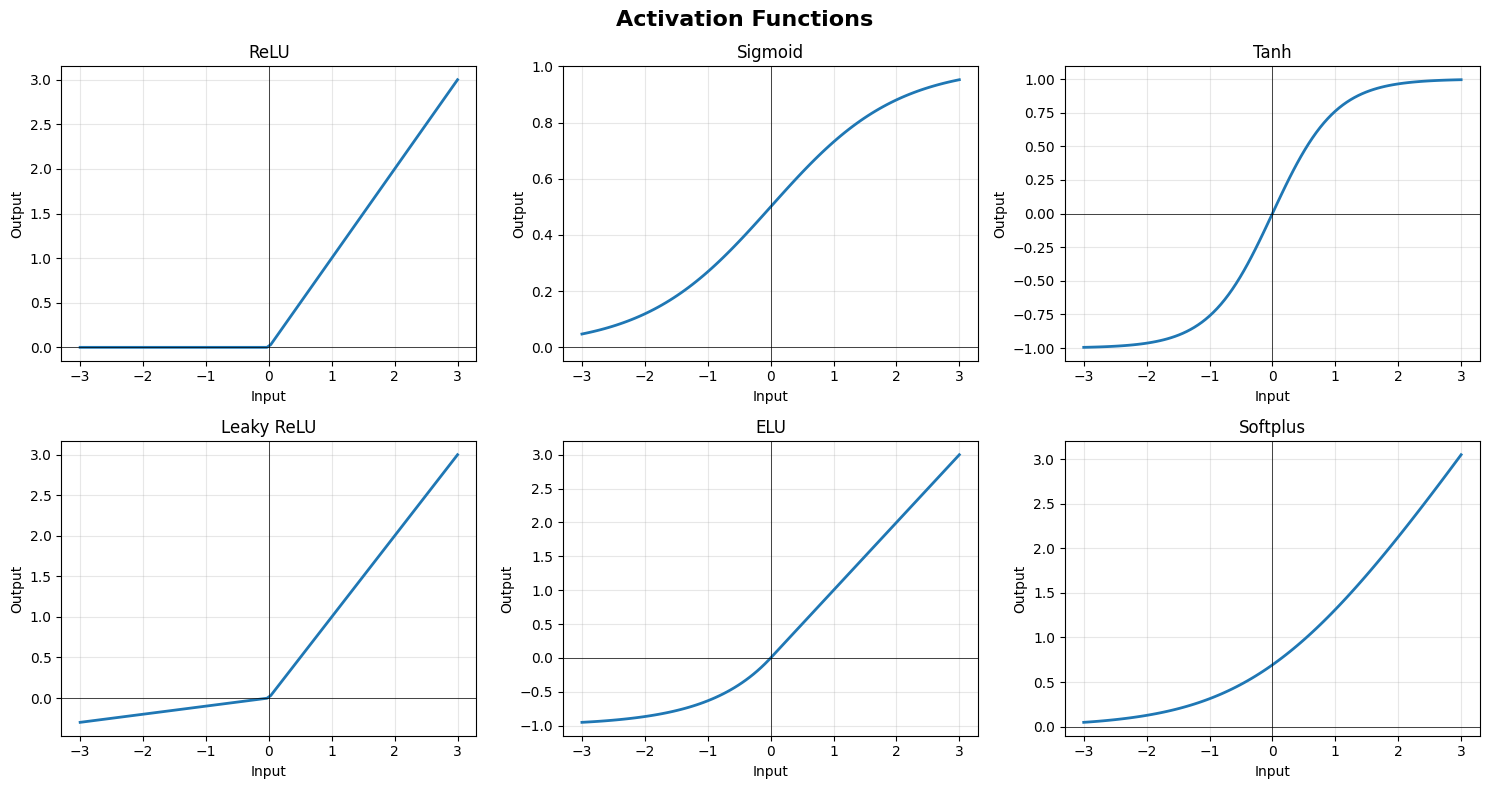

In [125]:
# (d) Activation Functions
print("\n" + "="*60)
print("(d) Activation Functions")
print("="*60)

test_input = torch.tensor([[-2.0, -1.0, 0.0, 1.0, 2.0]])
print("\nTest Input:", test_input.numpy())

# ReLU
relu_output = F.relu(test_input)
print("\nReLU Output:", relu_output.numpy())

# Sigmoid
sigmoid_output = torch.sigmoid(test_input)
print("Sigmoid Output:", sigmoid_output.numpy())

# Tanh
tanh_output = torch.tanh(test_input)
print("Tanh Output:", tanh_output.numpy())

# Leaky ReLU
leaky_relu_output = F.leaky_relu(test_input, negative_slope=0.1)
print("Leaky ReLU Output:", leaky_relu_output.numpy())

# Softmax
softmax_output = F.softmax(test_input, dim=1)
print("Softmax Output:", softmax_output.numpy())
print("Sum of Softmax:", softmax_output.sum().item())

# Visualize activation functions
x = np.linspace(-3, 3, 100)
x_tensor = torch.tensor(x, dtype=torch.float32)

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Activation Functions', fontsize=16, fontweight='bold')

activations = [
    ('ReLU', F.relu(x_tensor)),
    ('Sigmoid', torch.sigmoid(x_tensor)),
    ('Tanh', torch.tanh(x_tensor)),
    ('Leaky ReLU', F.leaky_relu(x_tensor, 0.1)),
    ('ELU', F.elu(x_tensor)),
    ('Softplus', F.softplus(x_tensor))
]

for idx, (name, output) in enumerate(activations):
    row = idx // 3
    col = idx % 3
    axes[row, col].plot(x, output.numpy(), linewidth=2)
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].set_title(name)
    axes[row, col].axhline(y=0, color='k', linewidth=0.5)
    axes[row, col].axvline(x=0, color='k', linewidth=0.5)
    axes[row, col].set_xlabel('Input')
    axes[row, col].set_ylabel('Output')

plt.tight_layout()
plt.show()

In [126]:
# (e) Fully Connected Layer
print("\n" + "="*60)
print("(e) Fully Connected Layer")
print("="*60)

# Create a simple fully connected layer
fc_input = torch.randn(1, 9)  # Flattened 3x3 = 9 features
print("\nFC Input (9 features):")
print(fc_input.numpy())

fc_layer = nn.Linear(9, 5)  # 9 inputs to 5 outputs
fc_output = fc_layer(fc_input)
print("\nFC Output (5 outputs):")
print(fc_output.detach().numpy())

print("\nFC Layer Weights shape:", fc_layer.weight.shape)
print("FC Layer Bias shape:", fc_layer.bias.shape)


(e) Fully Connected Layer

FC Input (9 features):
[[ 0.26735088  0.1497797  -0.20889392 -0.38702095  0.99123776  0.46790305
  -0.20493191 -0.74090713  0.36183965]]

FC Output (5 outputs):
[[ 0.8139019   0.02512326  0.4020309  -0.4182645  -0.28779948]]

FC Layer Weights shape: torch.Size([5, 9])
FC Layer Bias shape: torch.Size([5])


In [127]:
# (f) Global Average Pooling
print("\n" + "="*60)
print("(f) Global Average Pooling")
print("="*60)

# Create input with multiple channels
gap_input = torch.randn(1, 3, 4, 4)  # (batch, channels, height, width)
print("\nInput shape:", gap_input.shape)
print("\nChannel 0:")
print(gap_input[0, 0].numpy())
print("Channel 1:")
print(gap_input[0, 1].numpy())
print("Channel 2:")
print(gap_input[0, 2].numpy())

# Global Average Pooling
gap = nn.AdaptiveAvgPool2d(1)
gap_output = gap(gap_input)
print("\nGlobal Average Pooling Output:")
print(gap_output.squeeze().numpy())
print(f"Shape: {gap_output.shape}")

# Verify manually
print("\nManual verification (average of each channel):")
for i in range(3):
    manual_avg = gap_input[0, i].mean().item()
    print(f"Channel {i}: {manual_avg:.4f}")


(f) Global Average Pooling

Input shape: torch.Size([1, 3, 4, 4])

Channel 0:
[[ 0.07325409  0.818653    1.4804739   0.3449295 ]
 [-1.4241269  -0.11632604 -0.9726739   0.95845777]
 [-1.4335212  -0.5665268  -0.4252834   0.26251873]
 [-1.4391239   0.5213817   0.3487517   0.967594  ]]
Channel 1:
[[-2.2933345   0.4975626  -0.4257231  -1.337147  ]
 [-0.19333632  0.65264356 -1.9005532   0.22857653]
 [-0.98080295  0.1947336  -1.653521    0.68141943]
 [ 1.4611194  -0.30975288 -1.6021603   1.3528969 ]]
Channel 2:
[[ 0.5712025   1.1179103  -1.2955716   0.05027597]
 [-0.58548135 -0.38999635  0.03581761  0.12058873]
 [-0.4908393   0.20801467 -1.158583   -0.9636623 ]
 [-0.3749967   0.8032529  -0.5187733  -1.5012764 ]]

Global Average Pooling Output:
[-0.03759795 -0.3517112  -0.27325734]
Shape: torch.Size([1, 3, 1, 1])

Manual verification (average of each channel):
Channel 0: -0.0376
Channel 1: -0.3517
Channel 2: -0.2733


In [128]:
# (g) Dense Layer
print("\n" + "="*60)
print("(g) Dense Layer (Same as Fully Connected)")
print("="*60)

# Dense layer is another name for fully connected layer
dense_layer = nn.Sequential(
    nn.Linear(10, 20),
    nn.ReLU(),
    nn.Linear(20, 5)
)

dense_input = torch.randn(1, 10)
dense_output = dense_layer(dense_input)

print("\nInput shape:", dense_input.shape)
print("Output shape:", dense_output.shape)
print("\nDense Layer Architecture:")
print(dense_layer)


(g) Dense Layer (Same as Fully Connected)

Input shape: torch.Size([1, 10])
Output shape: torch.Size([1, 5])

Dense Layer Architecture:
Sequential(
  (0): Linear(in_features=10, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=5, bias=True)
)



(h) Regularization Techniques

1. Dropout:
Input (all ones): [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
After Dropout (training mode): [[2. 0. 0. 2. 2. 0. 0. 2. 2. 0.]]
After Dropout (eval mode): [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

2. Batch Normalization:
Input (4 samples):
[[ 1.8259805  -0.89096427 -0.31749973]
 [ 1.3413665   1.7482308  -0.2887889 ]
 [-1.1213592  -0.43706378  0.8602693 ]
 [-0.02698     1.144054    0.4254537 ]]
Mean per feature: [0.5047519  0.3910642  0.16985857]
Std per feature: [1.3382258  1.2567534  0.57441896]

After Batch Normalization:
[[ 1.14003    -1.1779181  -0.9796708 ]
 [ 0.72187793  1.2469546  -0.9219573 ]
 [-1.4030998  -0.7608777   1.3878398 ]
 [-0.4588081   0.6918415   0.51378846]]
Mean per feature: [2.2351742e-08 5.9604645e-08 2.9802322e-08]
Std per feature: [1.1546962 1.1546956 1.1546772]

3. L1 and L2 Regularization:
L1 Regularization term: 7.6157
L2 Regularization term: 1.6165

4. Early Stopping (Conceptual):
Early stopping monitors validation loss and stops t

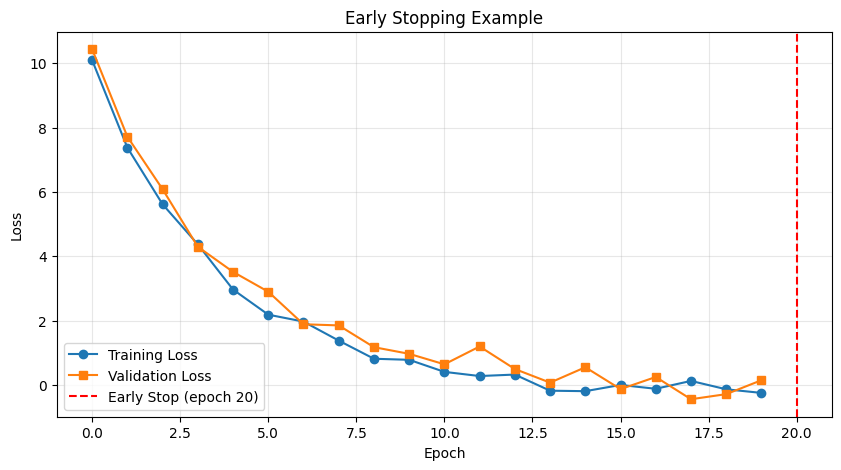

Training would stop at epoch 20 (patience=3)


In [129]:
# (h) Dropout, Batch Normalization, Early Stopping, L1 and L2 Regularization
print("\n" + "="*60)
print("(h) Regularization Techniques")
print("="*60)

# Dropout
print("\n1. Dropout:")
dropout = nn.Dropout(p=0.5)
dropout_input = torch.ones(1, 10)
print("Input (all ones):", dropout_input.numpy())
dropout.train()  # Enable dropout
dropout_output = dropout(dropout_input)
print("After Dropout (training mode):", dropout_output.numpy())
dropout.eval()  # Disable dropout
dropout_output_eval = dropout(dropout_input)
print("After Dropout (eval mode):", dropout_output_eval.numpy())

# Batch Normalization
print("\n2. Batch Normalization:")
bn_input = torch.randn(4, 3)  # 4 samples, 3 features
print("Input (4 samples):")
print(bn_input.numpy())
print("Mean per feature:", bn_input.mean(dim=0).numpy())
print("Std per feature:", bn_input.std(dim=0).numpy())

bn = nn.BatchNorm1d(3)
bn_output = bn(bn_input)
print("\nAfter Batch Normalization:")
print(bn_output.detach().numpy())
print("Mean per feature:", bn_output.mean(dim=0).detach().numpy())
print("Std per feature:", bn_output.std(dim=0).detach().numpy())

# L1 and L2 Regularization
print("\n3. L1 and L2 Regularization:")
model = nn.Linear(10, 5)
weights = model.weight

# L1 regularization (sum of absolute values)
l1_reg = torch.sum(torch.abs(weights))
print(f"L1 Regularization term: {l1_reg.item():.4f}")

# L2 regularization (sum of squared values)
l2_reg = torch.sum(weights ** 2)
print(f"L2 Regularization term: {l2_reg.item():.4f}")

# Early Stopping (conceptual)
print("\n4. Early Stopping (Conceptual):")
print("""Early stopping monitors validation loss and stops training 
when it stops improving for a specified number of epochs (patience).""")

# Simulate training history
epochs = 20
train_loss = [10 * np.exp(-0.3 * i) + np.random.randn() * 0.2 for i in range(epochs)]
val_loss = [10 * np.exp(-0.25 * i) + np.random.randn() * 0.3 for i in range(epochs)]

# Find early stopping point (patience = 3)
patience = 3
best_val_loss = float('inf')
patience_counter = 0
early_stop_epoch = epochs

for epoch in range(epochs):
    if val_loss[epoch] < best_val_loss:
        best_val_loss = val_loss[epoch]
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            early_stop_epoch = epoch
            break

plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='s')
plt.axvline(x=early_stop_epoch, color='r', linestyle='--', 
           label=f'Early Stop (epoch {early_stop_epoch})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Early Stopping Example')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Training would stop at epoch {early_stop_epoch} (patience={patience})")

In [130]:
# (i) Fully Connected Layers (Multi-layer)
print("\n" + "="*60)
print("(i) Multi-layer Fully Connected Network")
print("="*60)

# Create a multi-layer fully connected network
mlp = nn.Sequential(
    nn.Linear(9, 16),
    nn.ReLU(),
    nn.Linear(16, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 3)
)

mlp_input = torch.randn(1, 9)
mlp_output = mlp(mlp_input)

print("\nMulti-layer Perceptron Architecture:")
print(mlp)
print("\nInput shape:", mlp_input.shape)
print("Output shape:", mlp_output.shape)
print("\nOutput:", mlp_output.detach().numpy())

# Count parameters
total_params = sum(p.numel() for p in mlp.parameters())
print(f"\nTotal parameters: {total_params}")


(i) Multi-layer Fully Connected Network

Multi-layer Perceptron Architecture:
Sequential(
  (0): Linear(in_features=9, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=16, bias=True)
  (5): ReLU()
  (6): Linear(in_features=16, out_features=3, bias=True)
)

Input shape: torch.Size([1, 9])
Output shape: torch.Size([1, 3])

Output: [[-0.02684309  0.05183324  0.17438318]]

Total parameters: 1283



(j) Overfitting and Underfitting Demonstration


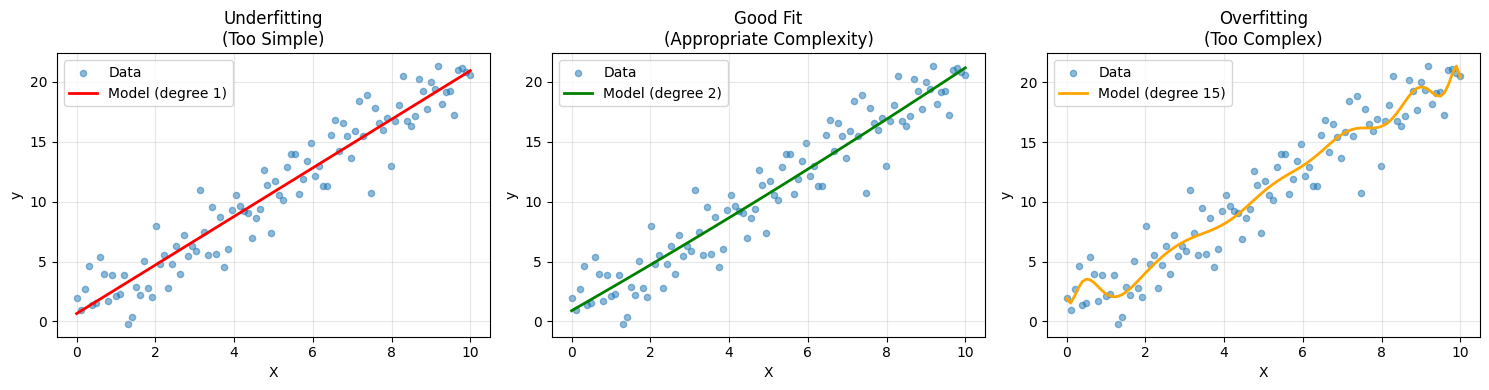


Training MSE:
Underfitting model: 3.2596
Good fit model:     3.2472
Overfitting model:  2.8137

Note: Overfitting model has lowest training error but would
perform poorly on new data due to fitting noise in training set.


In [131]:
# (j) Testing Overfitting and Underfitting
print("\n" + "="*60)
print("(j) Overfitting and Underfitting Demonstration")
print("="*60)

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 2 * X + 1 + np.random.randn(100) * 2  # Linear relationship with noise

# Create three models with different complexities
# Underfitting: Too simple (linear)
underfit_coeffs = np.polyfit(X, y, 1)
underfit_pred = np.poly1d(underfit_coeffs)(X)

# Good fit: Appropriate complexity
goodfit_coeffs = np.polyfit(X, y, 2)
goodfit_pred = np.poly1d(goodfit_coeffs)(X)

# Overfitting: Too complex (high degree polynomial)
overfit_coeffs = np.polyfit(X, y, 15)
overfit_pred = np.poly1d(overfit_coeffs)(X)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].scatter(X, y, alpha=0.5, s=20, label='Data')
axes[0].plot(X, underfit_pred, 'r-', linewidth=2, label='Model (degree 1)')
axes[0].set_title('Underfitting\n(Too Simple)')
axes[0].set_xlabel('X')
axes[0].set_ylabel('y')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].scatter(X, y, alpha=0.5, s=20, label='Data')
axes[1].plot(X, goodfit_pred, 'g-', linewidth=2, label='Model (degree 2)')
axes[1].set_title('Good Fit\n(Appropriate Complexity)')
axes[1].set_xlabel('X')
axes[1].set_ylabel('y')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

axes[2].scatter(X, y, alpha=0.5, s=20, label='Data')
axes[2].plot(X, overfit_pred, 'orange', linewidth=2, label='Model (degree 15)')
axes[2].set_title('Overfitting\n(Too Complex)')
axes[2].set_xlabel('X')
axes[2].set_ylabel('y')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate MSE
mse_underfit = np.mean((y - underfit_pred) ** 2)
mse_goodfit = np.mean((y - goodfit_pred) ** 2)
mse_overfit = np.mean((y - overfit_pred) ** 2)

print(f"\nTraining MSE:")
print(f"Underfitting model: {mse_underfit:.4f}")
print(f"Good fit model:     {mse_goodfit:.4f}")
print(f"Overfitting model:  {mse_overfit:.4f}")
print("\nNote: Overfitting model has lowest training error but would")
print("perform poorly on new data due to fitting noise in training set.")

---
## Experiment 19: Load and Prepare Dataset
Load CIFAR-10 dataset (subset of 600 images for experiments)

**CIFAR-10** contains 60,000 32x32 color images in 10 classes. We'll use a subset for faster training.

Using device: cpu


Dataset loaded successfully!
Training samples: 600 (60 per class)
Test samples: 200 (20 per class)
Number of classes: 10
Classes: ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Sample images from the dataset:


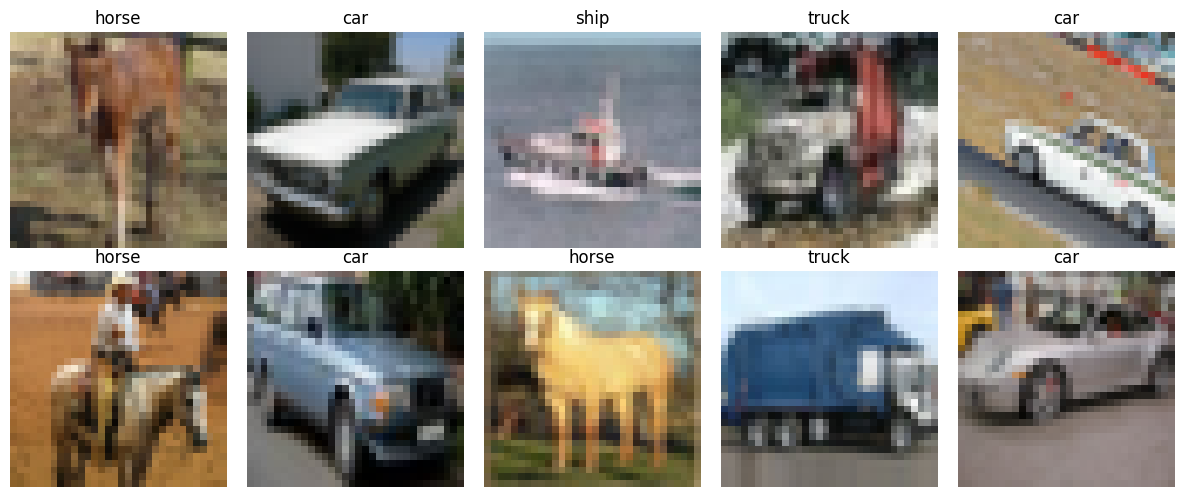

In [132]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix
import time

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Download CIFAR-10 dataset
print("\nDownloading CIFAR-10 dataset...")
train_dataset_full = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform
)

test_dataset_full = torchvision.datasets.CIFAR10(
    root='./data', 
    train=False, 
    download=True, 
    transform=transform
)

# Create subset of 600 images for training (60 per class)
# and 200 for testing (20 per class)
num_train_per_class = 60
num_test_per_class = 20

train_indices = []
test_indices = []

# Get indices for each class
for class_idx in range(10):
    # Training indices
    train_class_indices = [i for i, (_, label) in enumerate(train_dataset_full) if label == class_idx]
    train_indices.extend(train_class_indices[:num_train_per_class])
    
    # Test indices
    test_class_indices = [i for i, (_, label) in enumerate(test_dataset_full) if label == class_idx]
    test_indices.extend(test_class_indices[:num_test_per_class])

# Create subsets
train_dataset = Subset(train_dataset_full, train_indices)
test_dataset = Subset(test_dataset_full, test_indices)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Class names
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print(f"\nDataset loaded successfully!")
print(f"Training samples: {len(train_dataset)} (60 per class)")
print(f"Test samples: {len(test_dataset)} (20 per class)")
print(f"Number of classes: {len(classes)}")
print(f"Classes: {classes}")

# Visualize some samples
def show_images(loader, num_images=10):
    dataiter = iter(loader)
    images, labels = next(dataiter)
    
    # Denormalize images
    images = images / 2 + 0.5
    
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    axes = axes.ravel()
    
    for i in range(min(num_images, len(images))):
        axes[i].imshow(np.transpose(images[i].numpy(), (1, 2, 0)))
        axes[i].set_title(f'{classes[labels[i]]}')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

print("\nSample images from the dataset:")
show_images(train_loader, num_images=10)

---
## Experiment 20: Custom CNN Implementation
Build a custom CNN using basic ingredients from Experiment 18

Using the CNN components we learned (convolution, pooling, batch normalization, dropout, etc.), we'll build a complete custom CNN architecture.

Custom CNN Architecture:
CustomCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

Total parameters: 652,426
Trainable parameters: 652,426

Training Custom CNN...
Epoch [1/15], Loss: 2.3

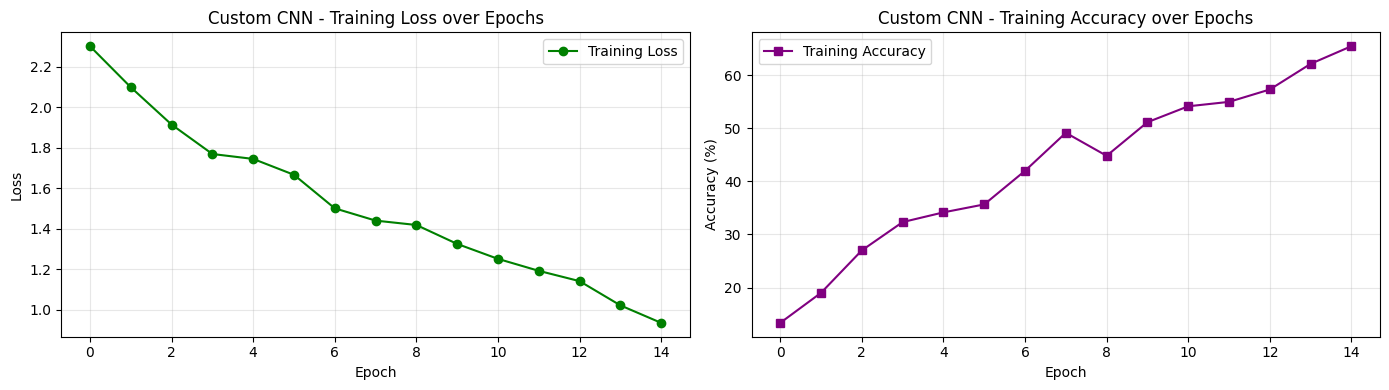

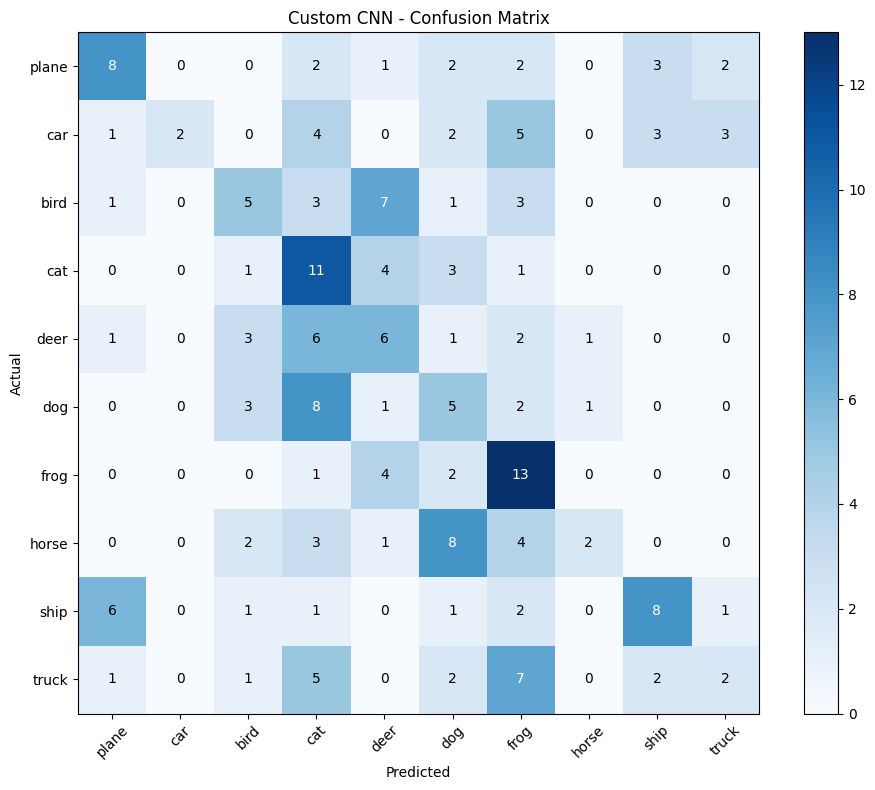


Custom CNN Classification Report:
              precision    recall  f1-score   support

       plane       0.44      0.40      0.42        20
         car       1.00      0.10      0.18        20
        bird       0.31      0.25      0.28        20
         cat       0.25      0.55      0.34        20
        deer       0.25      0.30      0.27        20
         dog       0.19      0.25      0.21        20
        frog       0.32      0.65      0.43        20
       horse       0.50      0.10      0.17        20
        ship       0.50      0.40      0.44        20
       truck       0.25      0.10      0.14        20

    accuracy                           0.31       200
   macro avg       0.40      0.31      0.29       200
weighted avg       0.40      0.31      0.29       200



In [133]:
# Define Custom CNN Architecture
class CustomCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CustomCNN, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        
        # Pooling
        self.pool = nn.MaxPool2d(2, 2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(128, num_classes)
    
    def forward(self, x):
        # Conv Block 1
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # 32x32 -> 16x16
        # Conv Block 2
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # 16x16 -> 8x8
        # Conv Block 3
        x = self.pool(F.relu(self.bn3(self.conv3(x))))  # 8x8 -> 4x4
        
        # Flatten
        x = x.view(-1, 128 * 4 * 4)
        
        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        
        return x

# Initialize model
custom_cnn = CustomCNN(num_classes=10).to(device)

# Print model architecture
print("Custom CNN Architecture:")
print("="*60)
print(custom_cnn)
print("="*60)

# Count parameters
custom_params = sum(p.numel() for p in custom_cnn.parameters())
trainable_params = sum(p.numel() for p in custom_cnn.parameters() if p.requires_grad)
print(f"\nTotal parameters: {custom_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(custom_cnn.parameters(), lr=0.001)

# Training function
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    train_losses = []
    train_accuracies = []
    
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Zero the gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            # Statistics
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')
    
    return train_losses, train_accuracies

# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    accuracy = 100 * correct / total
    return accuracy, all_preds, all_labels

# Train the model
print("\n" + "="*60)
print("Training Custom CNN...")
print("="*60)
start_time = time.time()
customcnn_train_losses, customcnn_train_accs = train_model(custom_cnn, train_loader, criterion, optimizer, epochs=15)
training_time = time.time() - start_time
print(f"\nTraining completed in {training_time:.2f} seconds")

# Evaluate the model
print("\n" + "="*60)
print("Evaluating Custom CNN...")
print("="*60)
test_accuracy, predictions, true_labels = evaluate_model(custom_cnn, test_loader)
customcnn_test_acc = test_accuracy
print(f'Test Accuracy: {test_accuracy:.2f}%')

# Plot training curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

ax1.plot(customcnn_train_losses, marker='o', color='green', label='Training Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Custom CNN - Training Loss over Epochs')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(customcnn_train_accs, marker='s', color='purple', label='Training Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Custom CNN - Training Accuracy over Epochs')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Custom CNN - Confusion Matrix')
plt.xticks(range(10), classes, rotation=45)
plt.yticks(range(10), classes)

for i in range(10):
    for j in range(10):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center',
                color='white' if cm[i, j] > cm.max()/2 else 'black')

plt.tight_layout()
plt.show()

# Classification report
print("\nCustom CNN Classification Report:")
print(classification_report(true_labels, predictions, target_names=classes))


---
## Experiment 21: VGG16 Network Implementation  
Implement VGG16 architecture (adapted for CIFAR-10 32x32 images)

VGG16 is known for its simplicity - using only 3x3 convolutions stacked deeply.


VGG16 Model Architecture:
VGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=Fal

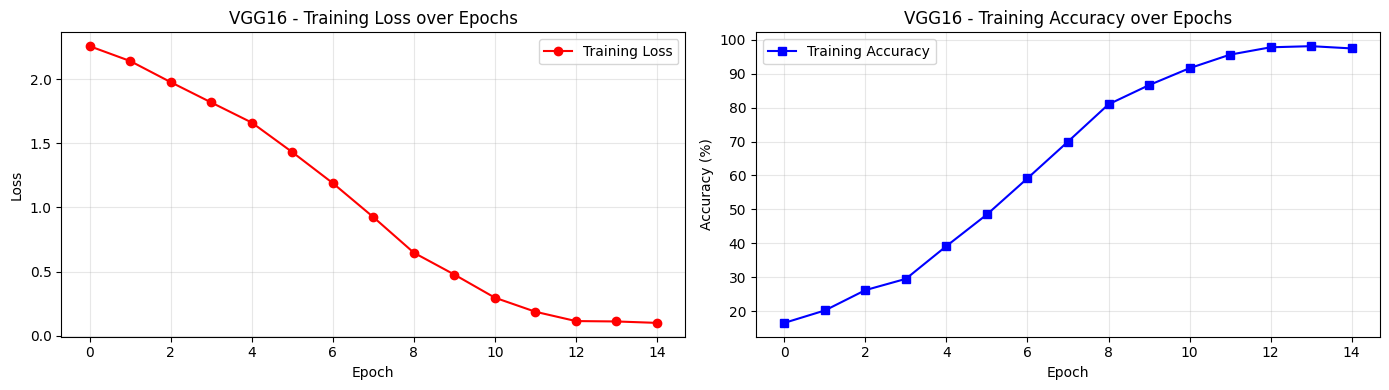

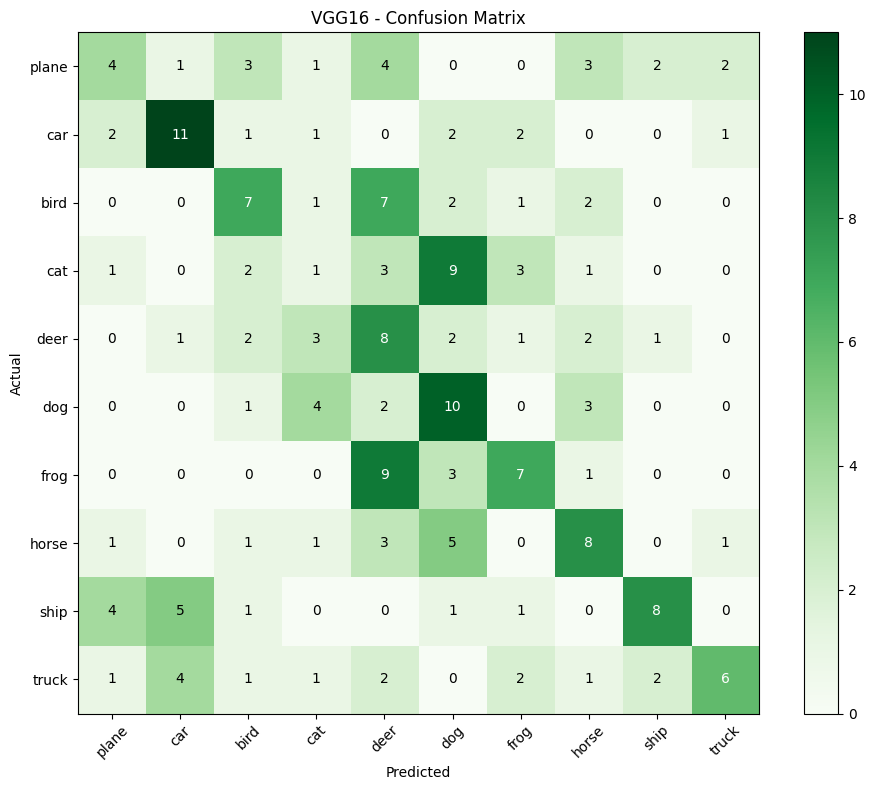


VGG16 Classification Report:
              precision    recall  f1-score   support

       plane       0.31      0.20      0.24        20
         car       0.50      0.55      0.52        20
        bird       0.37      0.35      0.36        20
         cat       0.08      0.05      0.06        20
        deer       0.21      0.40      0.28        20
         dog       0.29      0.50      0.37        20
        frog       0.41      0.35      0.38        20
       horse       0.38      0.40      0.39        20
        ship       0.62      0.40      0.48        20
       truck       0.60      0.30      0.40        20

    accuracy                           0.35       200
   macro avg       0.38      0.35      0.35       200
weighted avg       0.38      0.35      0.35       200



In [134]:
# VGG16 Implementation (adapted for CIFAR-10 32x32 images)
class VGG16(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16, self).__init__()
        
        self.features = nn.Sequential(
            # Block 1: Conv-Conv-Pool
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 32x32 -> 16x16
            
            # Block 2: Conv-Conv-Pool
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 16x16 -> 8x8
            
            # Block 3: Conv-Conv-Conv-Pool
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 8x8 -> 4x4
            
            # Block 4: Conv-Conv-Conv-Pool
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 4x4 -> 2x2
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(512 * 2 * 2, 512),
            nn.ReLU(True),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(True),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes),
        )
    
    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Initialize VGG16
vgg16_model = VGG16(num_classes=10).to(device)
vgg16_params = sum(p.numel() for p in vgg16_model.parameters())

print("\nVGG16 Model Architecture:")
print("="*60)
print(vgg16_model)
print("="*60)
print(f"\nTotal VGG16 parameters: {vgg16_params:,}")

# Define loss and optimizer for VGG16
criterion_vgg = nn.CrossEntropyLoss()
optimizer_vgg = optim.Adam(vgg16_model.parameters(), lr=0.0001)  # Lower learning rate for VGG

# Train VGG16
print("\n" + "="*60)
print("Training VGG16...")
print("="*60)
start_time = time.time()
vgg16_train_losses, vgg16_train_accs = train_model(vgg16_model, train_loader, criterion_vgg, optimizer_vgg, epochs=15)
vgg_training_time = time.time() - start_time

print(f"\nTraining completed in {vgg_training_time:.2f} seconds")

# Evaluate VGG16
print("\n" + "="*60)
print("Evaluating VGG16...")
print("="*60)
vgg_test_accuracy, vgg_predictions, vgg_true_labels = evaluate_model(vgg16_model, test_loader)
vgg16_test_acc = vgg_test_accuracy
print(f'Test Accuracy: {vgg_test_accuracy:.2f}%')

# Plot training curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

ax1.plot(vgg16_train_losses, marker='o', color='red', label='Training Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('VGG16 - Training Loss over Epochs')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(vgg16_train_accs, marker='s', color='blue', label='Training Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('VGG16 - Training Accuracy over Epochs')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Confusion Matrix
cm_vgg = confusion_matrix(vgg_true_labels, vgg_predictions)
plt.figure(figsize=(10, 8))
plt.imshow(cm_vgg, cmap='Greens')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('VGG16 - Confusion Matrix')
plt.xticks(range(10), classes, rotation=45)
plt.yticks(range(10), classes)

for i in range(10):
    for j in range(10):
        plt.text(j, i, str(cm_vgg[i, j]), ha='center', va='center',
                color='white' if cm_vgg[i, j] > cm_vgg.max()/2 else 'black')

plt.tight_layout()
plt.show()

# Classification report
print("\nVGG16 Classification Report:")
print(classification_report(vgg_true_labels, vgg_predictions, target_names=classes))


---
## Experiment 22: MobileNet Implementation
Implement MobileNet with depthwise separable convolutions

MobileNet uses depthwise separable convolutions for efficiency - separating spatial and channel-wise operations.

In [135]:
# MobileNet with Depthwise Separable Convolutions
class DepthwiseSeparableConv(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(DepthwiseSeparableConv, self).__init__()
        
        # Depthwise convolution (spatial filtering)
        self.depthwise = nn.Conv2d(
            in_channels, in_channels, 
            kernel_size=3, stride=stride, padding=1, 
            groups=in_channels, bias=False
        )
        self.bn1 = nn.BatchNorm2d(in_channels)
        
        # Pointwise convolution (channel mixing)
        self.pointwise = nn.Conv2d(
            in_channels, out_channels, 
            kernel_size=1, stride=1, padding=0, bias=False
        )
        self.bn2 = nn.BatchNorm2d(out_channels)
        
    def forward(self, x):
        x = self.depthwise(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.pointwise(x)
        x = self.bn2(x)
        x = F.relu(x)
        return x

class MobileNet(nn.Module):
    def __init__(self, num_classes=10):
        super(MobileNet, self).__init__()
        
        # Initial convolution
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(32)
        
        # Depthwise separable convolutions
        self.layers = nn.Sequential(
            DepthwiseSeparableConv(32, 64, stride=1),
            DepthwiseSeparableConv(64, 128, stride=2),
            DepthwiseSeparableConv(128, 128, stride=1),
            DepthwiseSeparableConv(128, 256, stride=2),
            DepthwiseSeparableConv(256, 256, stride=1),
            DepthwiseSeparableConv(256, 512, stride=2),
        )
        
        # Global average pooling and classifier
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.layers(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Initialize and train MobileNet
print("\n" + "="*80)
print("EXPERIMENT 22: MOBILENET TRAINING")
print("="*80)

mobilenet_model = MobileNet(num_classes=10).to(device)
print(f"\nMobileNet Model Architecture:")
print(mobilenet_model)

# Count parameters
mobilenet_params = sum(p.numel() for p in mobilenet_model.parameters())
print(f"\nTotal parameters: {mobilenet_params:,}")

# Training
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mobilenet_model.parameters(), lr=0.001)

num_epochs = 10
mobilenet_train_losses = []
mobilenet_train_accs = []

for epoch in range(num_epochs):
    mobilenet_model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = mobilenet_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    mobilenet_train_losses.append(epoch_loss)
    mobilenet_train_accs.append(epoch_acc)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

# Evaluation
mobilenet_model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = mobilenet_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

mobilenet_test_acc = 100 * correct / total
print(f'\nMobileNet Test Accuracy: {mobilenet_test_acc:.2f}%')



EXPERIMENT 22: MOBILENET TRAINING

MobileNet Model Architecture:
MobileNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): DepthwiseSeparableConv(
      (depthwise): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (pointwise): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): DepthwiseSeparableConv(
      (depthwise): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=64, bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (pointwise): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias

---
## Experiment 23: ResNet Implementation
Implement ResNet with residual connections (skip connections)

ResNet solves the vanishing gradient problem using skip connections that allow gradients to flow directly through the network.

In [136]:
# ResNet with Residual Blocks (Skip Connections)
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, 
                               stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, 
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        # Shortcut connection
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, 
                         stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
    
    def forward(self, x):
        identity = self.shortcut(x)
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = F.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        
        # Add skip connection
        out += identity
        out = F.relu(out)
        
        return out

class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        
        # Residual blocks
        self.layer1 = self._make_layer(64, 64, 2, stride=1)
        self.layer2 = self._make_layer(64, 128, 2, stride=2)
        self.layer3 = self._make_layer(128, 256, 2, stride=2)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)
    
    def _make_layer(self, in_channels, out_channels, num_blocks, stride):
        layers = []
        layers.append(ResidualBlock(in_channels, out_channels, stride))
        for _ in range(1, num_blocks):
            layers.append(ResidualBlock(out_channels, out_channels, stride=1))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Initialize and train ResNet
print("\n" + "="*80)
print("EXPERIMENT 23: RESNET TRAINING")
print("="*80)

resnet_model = ResNet(num_classes=10).to(device)
print(f"\nResNet Model Architecture:")
print(resnet_model)

# Count parameters
resnet_params = sum(p.numel() for p in resnet_model.parameters())
print(f"\nTotal parameters: {resnet_params:,}")

# Training
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet_model.parameters(), lr=0.001)

num_epochs = 10
resnet_train_losses = []
resnet_train_accs = []

for epoch in range(num_epochs):
    resnet_model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = resnet_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    resnet_train_losses.append(epoch_loss)
    resnet_train_accs.append(epoch_acc)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

# Evaluation
resnet_model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

resnet_test_acc = 100 * correct / total
print(f'\nResNet Test Accuracy: {resnet_test_acc:.2f}%')



EXPERIMENT 23: RESNET TRAINING

ResNet Model Architecture:
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fa

---
## Final Comparison: All Deep Learning Models
Compare performance of Custom CNN, VGG16, MobileNet, and ResNet

MODEL COMPARISON SUMMARY

Model           Parameters      Test Accuracy
--------------------------------------------------
Custom CNN      652,426         31.00%
VGG16           8,823,626       35.00%
MobileNet       274,250         27.50%
ResNet          2,777,674       32.00%


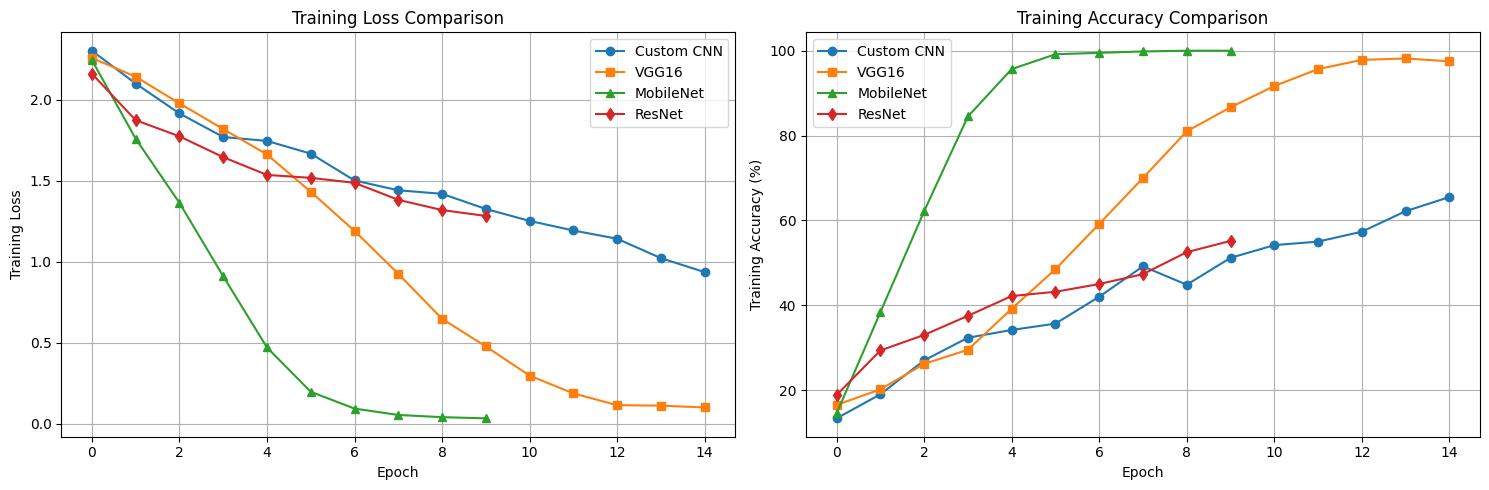


All experiments completed successfully!


In [137]:
# Model Comparison
print("="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)

# Create comparison table
models_comparison = [
    ['Custom CNN', custom_params, f'{customcnn_test_acc:.2f}%'],
    ['VGG16', vgg16_params, f'{vgg16_test_acc:.2f}%'],
    ['MobileNet', mobilenet_params, f'{mobilenet_test_acc:.2f}%'],
    ['ResNet', resnet_params, f'{resnet_test_acc:.2f}%']
]

print(f"\n{'Model':<15} {'Parameters':<15} {'Test Accuracy'}")
print("-" * 50)
for model_name, params, acc in models_comparison:
    print(f"{model_name:<15} {params:<15,} {acc}")

# Plot training curves comparison
plt.figure(figsize=(15, 5))

# Training Loss
plt.subplot(1, 2, 1)
plt.plot(customcnn_train_losses, label='Custom CNN', marker='o')
plt.plot(vgg16_train_losses, label='VGG16', marker='s')
plt.plot(mobilenet_train_losses, label='MobileNet', marker='^')
plt.plot(resnet_train_losses, label='ResNet', marker='d')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)

# Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(customcnn_train_accs, label='Custom CNN', marker='o')
plt.plot(vgg16_train_accs, label='VGG16', marker='s')
plt.plot(mobilenet_train_accs, label='MobileNet', marker='^')
plt.plot(resnet_train_accs, label='ResNet', marker='d')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy (%)')
plt.title('Training Accuracy Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("All experiments completed successfully!")
print("="*80)
